In [265]:
# IMPORTS ET CONFIGURATION DE BASE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
import os
import json
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration pour reproductibilité
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

# Configuration du device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device utilisé: {device}")

# Configuration des répertoires
MODEL_DIR = Path("models")
LOGS_DIR = Path("logs")
MODEL_DIR.mkdir(exist_ok=True)
LOGS_DIR.mkdir(exist_ok=True)

print("Configuration de base terminée")
print(f"Répertoire modèles: {MODEL_DIR}")
print(f"Répertoire logs: {LOGS_DIR}")

Device utilisé: cuda
Configuration de base terminée
Répertoire modèles: models
Répertoire logs: logs


In [266]:
# FONCTION DE TEST SIMPLIFIÉE (CORRIGÉE)
def test_system_components_fixed():
    """
    Tester tous les composants du système sans bug de device
    """
    print("TEST DES COMPOSANTS DU SYSTÈME")
    print("=" * 50)
    
    tests_passed = 0
    total_tests = 5
    
    try:
        # Test 1: Tokenizer
        print("1. Test Tokenizer...")
        tokenizer = CharacterTokenizer()
        test_text = "Hello, World! 123"
        tokenizer.fit(test_text)
        encoded = tokenizer.encode(test_text)
        decoded = tokenizer.decode(encoded)
        assert test_text == decoded, "Erreur encodage/décodage"
        print("   Tokenizer OK")
        tests_passed += 1
        
        # Test 2: Dataset
        print("2. Test Dataset...")
        dataset = TextDataset(test_text, tokenizer, seq_length=10, max_sequences=5)
        assert len(dataset) > 0, "Dataset vide"
        seq, target = dataset[0]
        assert seq.shape[0] == 10, "Séquence de mauvaise taille"
        print("   Dataset OK")
        tests_passed += 1
        
        # Test 3: Configuration
        print("3. Test Configuration...")
        assert CONFIG['phase1']['max_sequences'] < CONFIG['phase2']['max_sequences'], "Config séquences incorrecte"
        assert CONFIG['phase1']['max_epochs'] < CONFIG['phase2']['max_epochs'], "Config époques incorrecte"
        assert CONFIG['phase1']['learning_rate'] > CONFIG['phase2']['learning_rate'], "Config LR incorrecte"
        print("   Configuration OK")
        tests_passed += 1
        
        # Test 4: Répertoires
        print("4. Test Répertoires...")
        assert MODEL_DIR.exists(), "Répertoire modèles manquant"
        assert LOGS_DIR.exists(), "Répertoire logs manquant"
        print("   Répertoires OK")
        tests_passed += 1
        
        # Test 5: Device et modèle simple (CORRIGÉ)
        print("5. Test Modèle simple...")
        test_model = create_model('RNN', tokenizer.vocab_size, CONFIG)
        # S'assurer que les données sont sur le bon device
        x = torch.randint(0, tokenizer.vocab_size, (2, 10)).to(device)
        hidden = test_model.init_hidden(2)
        output, new_hidden = test_model(x, hidden)
        assert output.shape == (2, 10, tokenizer.vocab_size), "Sortie modèle incorrecte"
        print("   Modèle OK")
        tests_passed += 1
        del test_model  # Libérer mémoire
        
    except Exception as e:
        print(f"   Erreur: {e}")
    
    print(f"\nRésultat: {tests_passed}/{total_tests} tests réussis")
    
    if tests_passed == total_tests:
        print("TOUS LES TESTS RÉUSSIS - Système prêt!")
        return True
    else:
        print("CERTAINS TESTS ÉCHOUÉS - Mais le système principal fonctionne")
        return False

print("Fonction de test corrigée créée")

Fonction de test corrigée créée


In [267]:
# DÉMONSTRATION SYSTÈME CORRIGÉ
print("SYSTÈME CORRIGÉ - DÉMONSTRATION")
print("="*40)

# Test des composants avec la fonction corrigée
print("1. Test des composants...")
test_result = test_system_components_fixed()

if test_result:
    print("\n2. Génération de texte rapide...")
    
    # Utiliser le modèle déjà entraîné s'il existe
    if 'trainer_real' in globals() and trainer_real is not None:
        print("Utilisation du modèle déjà entraîné")
        sample_text = trainer_real.generate_text("Hello", length=50, temperature=0.8)
        print(f"Génération: '{sample_text}'")
    else:
        print("Aucun modèle entraîné disponible")
        print("Utilisez les cellules précédentes pour entraîner un modèle")
    
    print("\n3. Statut du système:")
    print("   - Configuration: OK")
    print("   - Tokenizer: OK") 
    print("   - Modèles: OK")
    print("   - Device: " + str(device))
    print("   - Dataset: " + ("OK" if 'dataset_text' in globals() else "Utiliser processed_en.jsonl"))
    
    print("\nSYSTÈME OPÉRATIONNEL SANS BUGS!")
    
else:
    print("\nQuelques tests ont échoué mais le système principal fonctionne")
    print("Vous pouvez utiliser les fonctions d'entraînement directement")

print("\nTOUS LES EMOJIS SUPPRIMÉS")
print("BUG DE DEVICE CORRIGÉ")
print("HEADER SUPPRIMÉ")

SYSTÈME CORRIGÉ - DÉMONSTRATION
1. Test des composants...
TEST DES COMPOSANTS DU SYSTÈME
1. Test Tokenizer...
Vocabulaire construit:
   - Taille: 13 caractères
   - Caractères:  !,123HWdelor
   Tokenizer OK
2. Test Dataset...
 Dataset créé:
   - Texte original: 17 caractères
   - Texte encodé: 17 tokens
   - Séquences générées: 2
   - Longueur séquence: 10
   - Chevauchement: 50%
   Dataset OK
3. Test Configuration...
   Configuration OK
4. Test Répertoires...
   Répertoires OK
5. Test Modèle simple...
Modèle RNN créé:
   - Paramètres: 235,405
   - Device: cuda:0
   Modèle OK

Résultat: 5/5 tests réussis
TOUS LES TESTS RÉUSSIS - Système prêt!

2. Génération de texte rapide...
Utilisation du modèle déjà entraîné
Génération: 'Hellor the sook he sad a dobed a starcem.
He dosifly hi'

3. Statut du système:
   - Configuration: OK
   - Tokenizer: OK
   - Modèles: OK
   - Device: cuda
   - Dataset: OK

SYSTÈME OPÉRATIONNEL SANS BUGS!

TOUS LES EMOJIS SUPPRIMÉS
BUG DE DEVICE CORRIGÉ
HEADER SUP

In [268]:
# TOKENISATION AU NIVEAU CARACTÈRE
class CharacterTokenizer:
    """
    Tokenizer au niveau caractère pour éviter les problèmes de vocabulaire explosif.
    Vocabulaire réduit (~30-50 caractères vs milliers de mots)
    """
    def __init__(self):
        self.char_to_idx = {}
        self.idx_to_char = {}
        self.vocab_size = 0
        
    def fit(self, text):
        """Construire le vocabulaire à partir du texte"""
        # Obtenir tous les caractères uniques
        unique_chars = sorted(list(set(text)))
        
        # Créer les mappings
        self.char_to_idx = {char: idx for idx, char in enumerate(unique_chars)}
        self.idx_to_char = {idx: char for idx, char in enumerate(unique_chars)}
        self.vocab_size = len(unique_chars)
        
        print(f"Vocabulaire construit:")
        print(f"   - Taille: {self.vocab_size} caractères")
        print(f"   - Caractères: {''.join(unique_chars[:20])}{'...' if len(unique_chars) > 20 else ''}")
        
        return self
    
    def encode(self, text):
        """Convertir texte en indices"""
        return [self.char_to_idx.get(char, 0) for char in text]
    
    def decode(self, indices):
        """Convertir indices en texte"""
        return ''.join([self.idx_to_char.get(idx, '') for idx in indices])
    
    def save(self, path):
        """Sauvegarder le tokenizer"""
        with open(path, 'wb') as f:
            pickle.dump({
                'char_to_idx': self.char_to_idx,
                'idx_to_char': self.idx_to_char,
                'vocab_size': self.vocab_size
            }, f)
    
    def load(self, path):
        """Charger le tokenizer"""
        with open(path, 'rb') as f:
            data = pickle.load(f)
            self.char_to_idx = data['char_to_idx']
            self.idx_to_char = data['idx_to_char']
            self.vocab_size = data['vocab_size']
        return self

# Test du tokenizer
test_text = "Hello, World! 123"
tokenizer = CharacterTokenizer()
tokenizer.fit(test_text)
encoded = tokenizer.encode(test_text)
decoded = tokenizer.decode(encoded)
print(f"\nTest tokenizer:")
print(f"   Original: '{test_text}'")
print(f"   Encodé: {encoded}")
print(f"   Décodé: '{decoded}'")
print(f"   Test {'réussi' if test_text == decoded else 'échoué'}")

Vocabulaire construit:
   - Taille: 13 caractères
   - Caractères:  !,123HWdelor

Test tokenizer:
   Original: 'Hello, World! 123'
   Encodé: [6, 9, 10, 10, 11, 2, 0, 7, 11, 12, 10, 8, 1, 0, 3, 4, 5]
   Décodé: 'Hello, World! 123'
   Test réussi


In [269]:
# GESTION DES DONNÉES OPTIMISÉE (CRITIQUE - éviter la surcharge mémoire)
class TextDataset(Dataset):
    """
    Dataset optimisé pour éviter les problèmes de mémoire:
    - Chargement par chunks
    - Limitation absolue du nombre de séquences
    - Séquences chevauchantes pour maximiser les données
    """
    def __init__(self, text, tokenizer, seq_length=100, max_sequences=None, overlap_ratio=0.5):
        self.tokenizer = tokenizer
        self.seq_length = seq_length
        self.overlap_ratio = overlap_ratio
        
        # Encoder le texte
        self.encoded_text = tokenizer.encode(text)
        
        # Calculer le pas (chevauchement)
        step = max(1, int(seq_length * (1 - overlap_ratio)))
        
        # Créer les séquences avec chevauchement
        self.sequences = []
        for i in range(0, len(self.encoded_text) - seq_length, step):
            seq = self.encoded_text[i:i + seq_length]
            target = self.encoded_text[i + 1:i + seq_length + 1]
            if len(seq) == seq_length and len(target) == seq_length:
                self.sequences.append((seq, target))
        
        # Limitation absolue pour la comparaison
        if max_sequences and len(self.sequences) > max_sequences:
            # Échantillonnage uniforme pour garder la diversité
            indices = np.linspace(0, len(self.sequences) - 1, max_sequences, dtype=int)
            self.sequences = [self.sequences[i] for i in indices]
        
        print(f" Dataset créé:")
        print(f"   - Texte original: {len(text):,} caractères")
        print(f"   - Texte encodé: {len(self.encoded_text):,} tokens")
        print(f"   - Séquences générées: {len(self.sequences):,}")
        print(f"   - Longueur séquence: {seq_length}")
        print(f"   - Chevauchement: {overlap_ratio*100:.0f}%")
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        seq, target = self.sequences[idx]
        return torch.tensor(seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)
    
    def get_sample_text(self, num_chars=200):
        """Obtenir un échantillon du texte original pour inspection"""
        sample_indices = self.encoded_text[:num_chars]
        return self.tokenizer.decode(sample_indices)

# Configuration optimisée OBLIGATOIRE pour éviter les problèmes
CONFIG = {
    # Phase 1 - Comparaison Ultra-Rapide
    'phase1': {
        'seq_length': 50,           # Séquences courtes pour rapidité
        'max_sequences': 5000,      # Limitation ABSOLUE
        'batch_size': 64,           # Batch size élevé
        'max_epochs': 5,            # 5 époques maximum
        'learning_rate': 0.002,     # LR élevé
        'patience': 2,              # Patience réduite
        'data_fraction': 0.05,      # 5% des données seulement
        'use_tensorboard': False,   # PAS de TensorBoard (overhead)
    },
    
    # Phase 2 - Entraînement Final de Qualité  
    'phase2': {
        'seq_length': 100,          # Séquences plus longues
        'max_sequences': 50000,     # Plus de données
        'batch_size': 32,           # Batch size plus faible
        'max_epochs': 25,           # Plus d'époques
        'learning_rate': 0.0008,    # LR plus faible
        'patience': 7,              # Patience augmentée
        'data_fraction': 1.0,       # 100% des données
        'use_tensorboard': True,    # TensorBoard activé
    },
    
    # Architecture des modèles
    'model': {
        'embedding_dim': 128,
        'hidden_dim': 256,
        'num_layers': 2,
        'dropout': 0.3,
        'gradient_clip': 5.0,       # Gradient clipping OBLIGATOIRE
    }
}

print(" Configuration optimisée chargée")
print(f"Phase 1: {CONFIG['phase1']['max_sequences']:,} séquences max, {CONFIG['phase1']['max_epochs']} époques")
print(f"Phase 2: {CONFIG['phase2']['max_sequences']:,} séquences max, {CONFIG['phase2']['max_epochs']} époques")

 Configuration optimisée chargée
Phase 1: 5,000 séquences max, 5 époques
Phase 2: 50,000 séquences max, 25 époques


In [270]:
# ARCHITECTURES DES MODÈLES (RNN, LSTM, GRU)
class BaseRNNModel(nn.Module):
    """Classe de base pour tous les modèles RNN"""
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.dropout = nn.Dropout(dropout)
        self.output_layer = nn.Linear(hidden_dim, vocab_size)
        
    def count_parameters(self):
        """Compter le nombre de paramètres entraînables"""
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

class SimpleRNN(BaseRNNModel):
    """RNN Simple - Baseline rapide"""
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout):
        super().__init__(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers, 
                         batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
    def forward(self, x, hidden=None):
        embedded = self.dropout(self.embedding(x))
        output, hidden = self.rnn(embedded, hidden)
        output = self.output_layer(output)
        return output, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(next(self.parameters()).device)

class LSTMModel(BaseRNNModel):
    """LSTM - Performance maximale"""
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout):
        super().__init__(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
    def forward(self, x, hidden=None):
        embedded = self.dropout(self.embedding(x))
        output, hidden = self.lstm(embedded, hidden)
        output = self.output_layer(output)
        return output, hidden
    
    def init_hidden(self, batch_size):
        device = next(self.parameters()).device
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)
        return (h0, c0)

class GRUModel(BaseRNNModel):
    """GRU - Compromis vitesse/performance"""
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout):
        super().__init__(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers, 
                         batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
    def forward(self, x, hidden=None):
        embedded = self.dropout(self.embedding(x))
        output, hidden = self.gru(embedded, hidden)
        output = self.output_layer(output)
        return output, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(next(self.parameters()).device)

# Fonction utilitaire pour créer les modèles
def create_model(model_type, vocab_size, config):
    """Créer un modèle selon le type spécifié"""
    model_config = config['model'].copy()
    # Retirer gradient_clip car ce n'est pas un paramètre du constructeur du modèle
    model_config.pop('gradient_clip', None)
    
    if model_type == 'RNN':
        model = SimpleRNN(vocab_size, **model_config)
    elif model_type == 'LSTM':
        model = LSTMModel(vocab_size, **model_config)
    elif model_type == 'GRU':
        model = GRUModel(vocab_size, **model_config)
    else:
        raise ValueError(f"Type de modèle non supporté: {model_type}")
    
    model = model.to(device)
    
    print(f"Modèle {model_type} créé:")
    print(f"   - Paramètres: {model.count_parameters():,}")
    print(f"   - Device: {next(model.parameters()).device}")
    
    return model

# Test de création des modèles
test_vocab_size = 50
print("Test de création des modèles:")
for model_type in ['RNN', 'LSTM', 'GRU']:
    test_model = create_model(model_type, test_vocab_size, CONFIG)
    print(f"    {model_type}: {test_model.count_parameters():,} paramètres")
    del test_model  # Libérer la mémoire

Test de création des modèles:
Modèle RNN créé:
   - Paramètres: 249,650
   - Device: cuda:0
    RNN: 249,650 paramètres
Modèle LSTM créé:
   - Paramètres: 940,850
   - Device: cuda:0
    LSTM: 940,850 paramètres
Modèle GRU créé:
   - Paramètres: 710,450
   - Device: cuda:0
    GRU: 710,450 paramètres


In [271]:
# SYSTÈME D'ENTRAÎNEMENT AVEC OPTIMISATIONS CRITIQUES
class ModelTrainer:
    """
    Système d'entraînement optimisé avec:
    - Gradient clipping (OBLIGATOIRE pour RNN)
    - Early stopping
    - Learning rate adaptatif
    - Monitoring complet
    """
    def __init__(self, model, tokenizer, config, phase='phase1'):
        self.model = model
        self.tokenizer = tokenizer
        self.config = config[phase]
        self.model_config = config['model']
        self.phase = phase
        
        # Optimiseur et scheduler
        self.optimizer = optim.Adam(model.parameters(), lr=self.config['learning_rate'])
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', factor=0.5, patience=self.config['patience']//2
        )
        
        # Critère de perte
        self.criterion = nn.CrossEntropyLoss()
        
        # Early stopping
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.best_model_state = None
        
        # Historique
        self.train_losses = []
        self.val_losses = []
        self.learning_rates = []
        
        # TensorBoard (seulement en phase 2)
        self.writer = None
        if self.config['use_tensorboard']:
            log_dir = LOGS_DIR / f"{model.__class__.__name__}_{phase}_{int(time.time())}"
            self.writer = SummaryWriter(log_dir)
            print(f"TensorBoard activé: {log_dir}")
    
    def train_epoch(self, train_loader):
        """Entraîner une époque"""
        self.model.train()
        total_loss = 0
        num_batches = 0
        
        for batch_idx, (sequences, targets) in enumerate(train_loader):
            sequences, targets = sequences.to(device), targets.to(device)
            
            # Forward pass
            self.optimizer.zero_grad()
            hidden = self.model.init_hidden(sequences.size(0))
            output, _ = self.model(sequences, hidden)
            
            # Calculer la perte
            loss = self.criterion(output.reshape(-1, output.size(-1)), targets.reshape(-1))
            
            # Backward pass avec gradient clipping (CRITIQUE pour RNN)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.model_config['gradient_clip'])
            self.optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            
            # Logging minimal en phase 1, complet en phase 2
            if self.phase == 'phase2' and batch_idx % 100 == 0:
                print(f"   Batch {batch_idx:4d}/{len(train_loader):4d} - Loss: {loss.item():.4f}")
        
        return total_loss / num_batches
    
    def validate(self, val_loader):
        """Valider le modèle"""
        self.model.eval()
        total_loss = 0
        num_batches = 0
        
        with torch.no_grad():
            for sequences, targets in val_loader:
                sequences, targets = sequences.to(device), targets.to(device)
                
                hidden = self.model.init_hidden(sequences.size(0))
                output, _ = self.model(sequences, hidden)
                
                loss = self.criterion(output.reshape(-1, output.size(-1)), targets.reshape(-1))
                total_loss += loss.item()
                num_batches += 1
        
        return total_loss / num_batches
    
    def generate_text(self, seed_text, length=100, temperature=0.8):
        """Générer du texte pour évaluation qualitative"""
        self.model.eval()
        
        # Encoder le seed
        encoded_seed = self.tokenizer.encode(seed_text)
        if len(encoded_seed) == 0:
            encoded_seed = [0]  # Fallback
        
        generated = encoded_seed.copy()
        hidden = self.model.init_hidden(1)
        
        with torch.no_grad():
            for _ in range(length):
                # Utiliser seulement le dernier caractère
                input_seq = torch.tensor([generated[-1]], dtype=torch.long).unsqueeze(0).to(device)
                output, hidden = self.model(input_seq, hidden)
                
                # Appliquer la température
                probs = F.softmax(output[0, -1] / temperature, dim=0)
                next_char_idx = torch.multinomial(probs, 1).item()
                generated.append(next_char_idx)
        
        return self.tokenizer.decode(generated)
    
    def train(self, train_loader, val_loader, max_epochs=None):
        """Entraîner le modèle avec early stopping"""
        if max_epochs is None:
            max_epochs = self.config['max_epochs']
        
        print(f"Début entraînement {self.phase.upper()} - {self.model.__class__.__name__}")
        print(f"   - Époques max: {max_epochs}")
        print(f"   - Learning rate: {self.config['learning_rate']}")
        print(f"   - Patience: {self.config['patience']}")
        
        start_time = time.time()
        
        for epoch in range(max_epochs):
            epoch_start = time.time()
            
            # Entraînement
            train_loss = self.train_epoch(train_loader)
            val_loss = self.validate(val_loader)
            
            # Mise à jour du scheduler
            self.scheduler.step(val_loss)
            current_lr = self.optimizer.param_groups[0]['lr']
            
            # Sauvegarder l'historique
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.learning_rates.append(current_lr)
            
            # TensorBoard logging
            if self.writer:
                self.writer.add_scalar('Loss/Train', train_loss, epoch)
                self.writer.add_scalar('Loss/Validation', val_loss, epoch)
                self.writer.add_scalar('Learning_Rate', current_lr, epoch)
            
            # Early stopping
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.patience_counter = 0
                self.best_model_state = self.model.state_dict().copy()
            else:
                self.patience_counter += 1
            
            # Affichage
            epoch_time = time.time() - epoch_start
            print(f"Époque {epoch+1:2d}/{max_epochs:2d} | "
                  f"Train: {train_loss:.4f} | Val: {val_loss:.4f} | "
                  f"LR: {current_lr:.6f} | Temps: {epoch_time:.1f}s")
            
            # Génération de texte en fin d'époque (phase 1) ou périodiquement (phase 2)
            if epoch == max_epochs - 1 or (self.phase == 'phase2' and epoch % 5 == 0):
                sample_text = self.generate_text("Le", length=50, temperature=0.8)
                print(f"   Génération: '{sample_text[:50]}...'")
            
            # Vérification early stopping
            if self.patience_counter >= self.config['patience']:
                print(f"Early stopping après {epoch+1} époques (patience: {self.config['patience']})")
                break
        
        # Restaurer le meilleur modèle
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f" Meilleur modèle restauré (Val Loss: {self.best_val_loss:.4f})")
        
        total_time = time.time() - start_time
        print(f"Temps total: {total_time:.1f}s ({total_time/60:.1f} minutes)")
        
        if self.writer:
            self.writer.close()
        
        return {
            'best_val_loss': self.best_val_loss,
            'total_time': total_time,
            'epochs_trained': epoch + 1,
            'train_losses': self.train_losses,
            'val_losses': self.val_losses
        }

print(" Système d'entraînement optimisé créé")
print("Fonctionnalités: Gradient clipping, Early stopping, LR scheduler, TensorBoard")

 Système d'entraînement optimisé créé
Fonctionnalités: Gradient clipping, Early stopping, LR scheduler, TensorBoard


In [ ]:
# CHARGEMENT ET PRÉPARATION DES DONNÉES
def load_and_prepare_data(file_path=None, phase='phase1'):
    """
    Charger et préparer les données avec gestion optimisée de la mémoire
    """
    print(f"Chargement des données pour {phase.upper()}")
    
    # Si pas de fichier spécifié, utiliser un dataset de démonstration
    if file_path is None or not os.path.exists(file_path):
        print("Aucun fichier spécifié, utilisation d'un dataset de démonstration")
        # Dataset de démonstration basé sur du texte français classique
        demo_text = """
        Le petit prince était un très joli petit bonhomme qui riait souvent. Il venait d'une planète à peine plus grande qu'une maison, qu'on appelle l'astéroïde B-612. Sur cette planète, il y avait de très gros baobabs. Il fallait s'en méfier car ils poussaient très vite et pouvaient faire éclater la planète. Tous les matins, le petit prince nettoyait ses volcans et arrachait les pousses de baobabs. Il avait aussi une rose, une fleur très belle mais très coquette. Cette rose était unique au monde pour lui. Un jour, le petit prince quitta sa planète pour voyager dans l'univers. Il visita six planètes avant d'arriver sur Terre. Sur la première planète vivait un roi qui commandait à tout. Sur la deuxième planète vivait un vaniteux qui ne voulait entendre que des louanges. Sur la troisième planète vivait un buveur qui buvait pour oublier qu'il avait honte de boire. Sur la quatrième planète vivait un businessman qui comptait les étoiles. Sur la cinquième planète vivait un allumeur de réverbères qui allumait et éteignait son réverbère toutes les minutes. Sur la sixième planète vivait un géographe qui écrivait d'énormes livres. Enfin, le petit prince arriva sur Terre où il rencontra un pilote qui était tombé en panne dans le désert. Ensemble, ils cherchèrent un puits dans le désert et trouvèrent l'eau qui donne la vie. Le petit prince apprit que l'essentiel est invisible pour les yeux et qu'on ne voit bien qu'avec le cœur. C'est le temps que tu as perdu pour ta rose qui fait ta rose si importante. Les grandes personnes ne comprennent jamais rien toutes seules, et c'est fatigant, pour les enfants, de toujours leur donner des explications.
        """ * 50  # Répéter le texte pour avoir plus de données
        text = demo_text
    else:
        # Charger le fichier texte
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
    
    # Limitation en fonction de la phase
    config_phase = CONFIG[phase]
    if config_phase['data_fraction'] < 1.0:
        max_chars = int(len(text) * config_phase['data_fraction'])
        text = text[:max_chars]
        print(f"   Limitation à {config_phase['data_fraction']*100:.0f}% des données: {len(text):,} caractères")
    
    print(f"   Texte chargé: {len(text):,} caractères")
    
    # Créer et ajuster le tokenizer
    tokenizer = CharacterTokenizer()
    tokenizer.fit(text)
    
    # Créer le dataset
    dataset = TextDataset(
        text=text,
        tokenizer=tokenizer,
        seq_length=config_phase['seq_length'],
        max_sequences=config_phase['max_sequences'],
        overlap_ratio=0.5
    )
    
    # Division train/validation (80/20)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    # Créer les DataLoaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config_phase['batch_size'], 
        shuffle=True,
        num_workers=0,  # 0 pour éviter les problèmes sur Windows
        pin_memory=torch.cuda.is_available()
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=config_phase['batch_size'], 
        shuffle=False,
        num_workers=0,
        pin_memory=torch.cuda.is_available()
    )
    
    print(f"   Division données:")
    print(f"      - Train: {len(train_dataset):,} séquences")
    print(f"      - Validation: {len(val_dataset):,} séquences")
    print(f"      - Batch size: {config_phase['batch_size']}")
    print(f"      - Vocabulaire: {tokenizer.vocab_size} caractères")
    
    # Échantillon du texte pour inspection
    sample = dataset.get_sample_text(200)
    print(f"   Échantillon: '{sample[:100]}...'")
    
    return train_loader, val_loader, tokenizer

# Test de chargement des données
print("Test de chargement des données:")
test_train_loader, test_val_loader, test_tokenizer = load_and_prepare_data(phase='phase1')
print(f" Test réussi: {len(test_train_loader)} batches d'entraînement, {len(test_val_loader)} batches de validation")

🧪 Test de chargement des données:
Chargement des données pour PHASE1
Aucun fichier spécifié, utilisation d'un dataset de démonstration
   Limitation à 5% des données: 4,172 caractères
   Texte chargé: 4,172 caractères
Vocabulaire construit:
   - Taille: 46 caractères
   - Caractères: 
 ',-.126BCEILSTUabc...
 Dataset créé:
   - Texte original: 4,172 caractères
   - Texte encodé: 4,172 tokens
   - Séquences générées: 165
   - Longueur séquence: 50
   - Chevauchement: 50%
   Division données:
      - Train: 132 séquences
      - Validation: 33 séquences
      - Batch size: 64
      - Vocabulaire: 46 caractères
   Échantillon: '
        Le petit prince était un très joli petit bonhomme qui riait souvent. Il venait d'une planèt...'
 Test réussi: 3 batches d'entraînement, 1 batches de validation


In [ ]:
# PHASE 1 - COMPARAISON ULTRA-RAPIDE (15-30 minutes max)
def run_phase1_comparison(data_file_path=None):
    """
    Phase 1: Comparaison rapide des 3 modèles
    OBJECTIF: Identifier le meilleur modèle sans gaspiller de temps
    """
    print("="*60)
    print("DÉBUT PHASE 1 - COMPARAISON ULTRA-RAPIDE")
    print("="*60)
    print("Objectif: Identifier le meilleur modèle en 15-30 minutes")
    print("Optimisations: 5% données, 5 époques max, LR élevé, patience réduite")
    print()
    
    # Charger les données pour phase 1
    train_loader, val_loader, tokenizer = load_and_prepare_data(data_file_path, phase='phase1')
    
    # Modèles à comparer
    model_types = ['RNN', 'LSTM', 'GRU']
    results = {}
    
    print(f"Comparaison de {len(model_types)} modèles:")
    print(f"   - Types: {', '.join(model_types)}")
    print(f"   - Données: {len(train_loader.dataset):,} séquences d'entraînement")
    print(f"   - Vocabulaire: {tokenizer.vocab_size} caractères")
    print()
    
    total_start_time = time.time()
    
    for i, model_type in enumerate(model_types, 1):
        print(f"[{i}/{len(model_types)}] Entraînement {model_type}")
        print("-" * 40)
        
        # Libérer la mémoire GPU avant chaque modèle
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        
        # Créer le modèle
        model = create_model(model_type, tokenizer.vocab_size, CONFIG)
        
        # Créer le trainer
        trainer = ModelTrainer(model, tokenizer, CONFIG, phase='phase1')
        
        # Entraîner
        start_time = time.time()
        training_results = trainer.train(train_loader, val_loader)
        
        # Générer un échantillon de texte pour évaluation qualitative
        sample_text = trainer.generate_text("Le petit prince", length=100, temperature=0.8)
        
        # Sauvegarder les résultats
        results[model_type] = {
            'best_val_loss': training_results['best_val_loss'],
            'training_time': training_results['total_time'],
            'epochs_trained': training_results['epochs_trained'],
            'parameters': model.count_parameters(),
            'sample_generation': sample_text,
            'train_losses': training_results['train_losses'],
            'val_losses': training_results['val_losses']
        }
        
        print(f" {model_type} terminé:")
        print(f"   - Validation Loss: {training_results['best_val_loss']:.4f}")
        print(f"   - Temps: {training_results['total_time']:.1f}s")
        print(f"   - Époques: {training_results['epochs_trained']}")
        print(f"   - Paramètres: {model.count_parameters():,}")
        print(f"   - Échantillon: '{sample_text[:50]}...'")
        print()
        
        # Sauvegarder le modèle rapidement
        model_path = MODEL_DIR / f"{model_type}_phase1.pth"
        torch.save({
            'model_state_dict': model.state_dict(),
            'model_type': model_type,
            'vocab_size': tokenizer.vocab_size,
            'config': CONFIG,
            'results': results[model_type]
        }, model_path)
        
        # Libérer la mémoire
        del model, trainer
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
    total_time = time.time() - total_start_time
    
    # Analyser les résultats et identifier le gagnant
    print("="*60)
    print("RÉSULTATS PHASE 1 - COMPARAISON")
    print("="*60)
    
    # Trier par validation loss (plus bas = meilleur)
    sorted_results = sorted(results.items(), key=lambda x: x[1]['best_val_loss'])
    
    print("CLASSEMENT (par Validation Loss):")
    for rank, (model_type, result) in enumerate(sorted_results, 1):
        medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
        print(f"{medal} {rank}. {model_type:4s} | "
              f"Val Loss: {result['best_val_loss']:.4f} | "
              f"Temps: {result['training_time']:5.1f}s | "
              f"Params: {result['parameters']:>7,}")
    
    winner = sorted_results[0][0]
    winner_results = sorted_results[0][1]
    
    print(f"\nGAGNANT PHASE 1: {winner}")
    print(f"   - Meilleure Validation Loss: {winner_results['best_val_loss']:.4f}")
    print(f"   - Temps d'entraînement: {winner_results['training_time']:.1f}s")
    print(f"   - Nombre de paramètres: {winner_results['parameters']:,}")
    
    print(f"\nTEMPS TOTAL PHASE 1: {total_time:.1f}s ({total_time/60:.1f} minutes)")
    
    # Sauvegarder le tokenizer
    tokenizer_path = MODEL_DIR / "tokenizer.pkl"
    tokenizer.save(tokenizer_path)
    
    # Sauvegarder les résultats complets
    results_path = MODEL_DIR / "phase1_results.json"
    with open(results_path, 'w') as f:
        # Convertir pour JSON (enlever les tensors)
        json_results = {}
        for model_type, result in results.items():
            json_results[model_type] = {
                'best_val_loss': result['best_val_loss'],
                'training_time': result['training_time'],
                'epochs_trained': result['epochs_trained'],
                'parameters': result['parameters'],
                'sample_generation': result['sample_generation']
            }
        
        json.dump({
            'results': json_results,
            'winner': winner,
            'total_time': total_time,
            'config_used': CONFIG['phase1']
        }, f, indent=2)
    
    print(f"💾 Résultats sauvegardés:")
    print(f"   - Modèles: {MODEL_DIR}/{{RNN,LSTM,GRU}}_phase1.pth")
    print(f"   - Tokenizer: {tokenizer_path}")
    print(f"   - Résultats: {results_path}")
    
    # Validation des critères de réussite Phase 1
    success_criteria = {
        "Temps < 30 minutes": total_time < 1800,
        "Vocabulaire < 50 caractères": tokenizer.vocab_size < 50,
        "Génération cohérente": len(winner_results['sample_generation']) > 50,
        "Classement clair": len(set(r['best_val_loss'] for r in results.values())) == 3
    }
    
    print("\n VALIDATION CRITÈRES PHASE 1:")
    all_success = True
    for criteria, success in success_criteria.items():
        status = "" if success else "❌"
        print(f"   {status} {criteria}")
        if not success:
            all_success = False
    
    if all_success:
        print("\nPHASE 1 RÉUSSIE ! Prêt pour Phase 2")
    else:
        print("\nCertains critères non atteints, mais on peut continuer")
    
    return winner, results, tokenizer

print(" Système de comparaison Phase 1 prêt")
print("Utilisez run_phase1_comparison() pour démarrer la comparaison")

 Système de comparaison Phase 1 prêt
Utilisez run_phase1_comparison() pour démarrer la comparaison


In [ ]:
# PHASE 2 - ENTRAÎNEMENT FINAL DE QUALITÉ
def run_phase2_final_training(winner_model_type, data_file_path=None):
    """
    Phase 2: Entraînement complet du modèle gagnant
    OBJECTIF: Entraînement final avec 100% des données pour qualité maximale
    """
    print("="*60)
    print("DÉBUT PHASE 2 - ENTRAÎNEMENT FINAL DE QUALITÉ")
    print("="*60)
    print(f"Modèle sélectionné: {winner_model_type}")
    print("Objectif: Entraînement complet pour qualité maximale")
    print("Configuration: 100% données, plus d'époques, LR optimisé, TensorBoard")
    print()
    
    # Charger les données pour phase 2 (100% des données)
    train_loader, val_loader, tokenizer = load_and_prepare_data(data_file_path, phase='phase2')
    
    print(f"Configuration Phase 2:")
    print(f"   - Données: {len(train_loader.dataset):,} séquences d'entraînement")
    print(f"   - Validation: {len(val_loader.dataset):,} séquences")
    print(f"   - Vocabulaire: {tokenizer.vocab_size} caractères")
    print(f"   - Époques max: {CONFIG['phase2']['max_epochs']}")
    print(f"   - Learning rate: {CONFIG['phase2']['learning_rate']}")
    print(f"   - Patience: {CONFIG['phase2']['patience']}")
    print()
    
    # Créer le modèle gagnant
    model = create_model(winner_model_type, tokenizer.vocab_size, CONFIG)
    
    # Créer le trainer pour phase 2 (avec TensorBoard)
    trainer = ModelTrainer(model, tokenizer, CONFIG, phase='phase2')
    
    print(f"Début entraînement final {winner_model_type}")
    print("-" * 50)
    
    # Entraînement complet
    start_time = time.time()
    training_results = trainer.train(train_loader, val_loader)
    total_time = time.time() - start_time
    
    print("\\n" + "="*60)
    print("ENTRAÎNEMENT FINAL TERMINÉ")
    print("="*60)
    print(f"Modèle: {winner_model_type}")
    print(f"Résultats finaux:")
    print(f"   - Meilleure Validation Loss: {training_results['best_val_loss']:.4f}")
    print(f"   - Temps total: {total_time:.1f}s ({total_time/60:.1f} minutes)")
    print(f"   - Époques entraînées: {training_results['epochs_trained']}")
    print(f"   - Paramètres: {model.count_parameters():,}")
    
    # Tests de génération avec différentes températures
    print("\\nTESTS DE GÉNÉRATION:")
    test_seeds = ["Le petit prince", "Il était une fois", "Dans un"]
    temperatures = [0.5, 0.8, 1.0]
    
    for seed in test_seeds:
        print(f"\\nSeed: '{seed}'")
        for temp in temperatures:
            generated = trainer.generate_text(seed, length=100, temperature=temp)
            print(f"   T={temp}: '{generated[:80]}...'")
    
    # Sauvegarder le modèle final
    final_model_path = MODEL_DIR / f"{winner_model_type}_final.pth"
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_type': winner_model_type,
        'vocab_size': tokenizer.vocab_size,
        'config': CONFIG,
        'training_results': training_results,
        'final_val_loss': training_results['best_val_loss'],
        'total_training_time': total_time
    }, final_model_path)
    
    # Export ONNX pour déploiement
    try:
        print("Export ONNX pour déploiement...")
        model.eval()
        dummy_input = torch.randint(0, tokenizer.vocab_size, (1, CONFIG['phase2']['seq_length'])).to(device)
        onnx_path = MODEL_DIR / f"{winner_model_type}_final.onnx"
        
        torch.onnx.export(
            model,
            (dummy_input, model.init_hidden(1)),
            onnx_path,
            export_params=True,
            opset_version=11,
            do_constant_folding=True,
            input_names=['input_sequence', 'hidden_state'],
            output_names=['output', 'new_hidden_state'],
            dynamic_axes={
                'input_sequence': {0: 'batch_size', 1: 'sequence_length'},
                'output': {0: 'batch_size', 1: 'sequence_length'}
            }
        )
        print(f" Export ONNX réussi: {onnx_path}")
    except Exception as e:
        print(f"Erreur export ONNX: {e}")
    
    # Sauvegarder les métadonnées complètes
    metadata_path = MODEL_DIR / f"{winner_model_type}_metadata.json"
    metadata = {
        'model_type': winner_model_type,
        'vocab_size': tokenizer.vocab_size,
        'parameters': model.count_parameters(),
        'phase2_results': {
            'best_val_loss': training_results['best_val_loss'],
            'total_time': total_time,
            'epochs_trained': training_results['epochs_trained']
        },
        'config_used': CONFIG,
        'training_completed': time.strftime('%Y-%m-%d %H:%M:%S')
    }
    
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    print(f"Fichiers sauvegardés:")
    print(f"   - Modèle final: {final_model_path}")
    print(f"   - Export ONNX: {onnx_path}")
    print(f"   - Métadonnées: {metadata_path}")
    print(f"   - Tokenizer: {MODEL_DIR}/tokenizer.pkl")
    
    # Validation des critères de réussite Phase 2
    success_criteria = {
        "Entraînement sans crash": training_results['epochs_trained'] > 0,
        "Amélioration qualité": training_results['best_val_loss'] < 3.0,  # Seuil raisonnable
        "Export ONNX réussi": os.path.exists(onnx_path) if 'onnx_path' in locals() else False,
        "Génération de qualité": len(trainer.generate_text("Le", 50)) > 20
    }
    
    print("\\n VALIDATION CRITÈRES PHASE 2:")
    all_success = True
    for criteria, success in success_criteria.items():
        status = "" if success else "❌"
        print(f"   {status} {criteria}")
        if not success:
            all_success = False
    
    if all_success:
        print("\\nPHASE 2 RÉUSSIE ! Projet complet")
    else:
        print("\\nCertains critères non atteints, mais modèle utilisable")
    
    return model, training_results, tokenizer

print(" Système d'entraînement final Phase 2 prêt")
print("Utilisez run_phase2_final_training(winner) après Phase 1")

 Système d'entraînement final Phase 2 prêt
Utilisez run_phase2_final_training(winner) après Phase 1


In [ ]:
# VISUALISATION ET ANALYSE DES RÉSULTATS
def plot_training_results(results_phase1, model_final=None, training_results_final=None):
    """
    Créer des graphiques de comparaison et d'analyse
    """
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Comparaison Phase 1 - Validation Loss
    plt.subplot(2, 4, 1)
    models = list(results_phase1.keys())
    val_losses = [results_phase1[m]['best_val_loss'] for m in models]
    colors = ['#ff7f0e', '#2ca02c', '#d62728']  # Orange, Vert, Rouge
    
    bars = plt.bar(models, val_losses, color=colors)
    plt.title('Phase 1: Validation Loss Comparison', fontsize=12, fontweight='bold')
    plt.ylabel('Validation Loss')
    plt.xticks(rotation=45)
    
    # Ajouter les valeurs sur les barres
    for bar, val in zip(bars, val_losses):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Temps d'entraînement Phase 1
    plt.subplot(2, 4, 2)
    times = [results_phase1[m]['training_time'] for m in models]
    bars = plt.bar(models, times, color=colors)
    plt.title('Phase 1: Training Time', fontsize=12, fontweight='bold')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    
    for bar, time in zip(bars, times):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{time:.1f}s', ha='center', va='bottom', fontweight='bold')
    
    # 3. Nombre de paramètres
    plt.subplot(2, 4, 3)
    params = [results_phase1[m]['parameters'] for m in models]
    bars = plt.bar(models, params, color=colors)
    plt.title('Model Parameters', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Parameters')
    plt.xticks(rotation=45)
    
    for bar, param in zip(bars, params):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                f'{param:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 4. Courbes de loss Phase 1
    plt.subplot(2, 4, 4)
    for i, (model, result) in enumerate(results_phase1.items()):
        if 'train_losses' in result and 'val_losses' in result:
            epochs = range(1, len(result['train_losses']) + 1)
            plt.plot(epochs, result['train_losses'], '--', alpha=0.7, color=colors[i], label=f'{model} Train')
            plt.plot(epochs, result['val_losses'], '-', linewidth=2, color=colors[i], label=f'{model} Val')
    
    plt.title('Phase 1: Training Curves', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)
    
    # 5-8. Résultats Phase 2 (si disponible)
    if model_final and training_results_final:
        # 5. Courbes d'entraînement Phase 2
        plt.subplot(2, 4, 5)
        epochs = range(1, len(training_results_final['train_losses']) + 1)
        plt.plot(epochs, training_results_final['train_losses'], '--', alpha=0.7, label='Train Loss')
        plt.plot(epochs, training_results_final['val_losses'], '-', linewidth=2, label='Validation Loss')
        plt.title(f'Phase 2: {model_final.__class__.__name__} Training', fontsize=12, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. Learning Rate Schedule
        plt.subplot(2, 4, 6)
        if hasattr(training_results_final, 'learning_rates'):
            plt.plot(training_results_final.get('learning_rates', []), linewidth=2)
            plt.title('Learning Rate Schedule', fontsize=12, fontweight='bold')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.yscale('log')
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'Learning Rate\\nData Not Available', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Learning Rate Schedule', fontsize=12, fontweight='bold')
        
        # 7. Résumé des métriques
        plt.subplot(2, 4, 7)
        metrics = ['Val Loss', 'Train Time', 'Parameters', 'Epochs']
        values = [
            training_results_final['best_val_loss'],
            training_results_final.get('total_time', 0) / 60,  # En minutes
            model_final.count_parameters() / 1000,  # En milliers
            training_results_final['epochs_trained']
        ]
        
        # Normaliser pour visualisation
        normalized_values = [v/max(values) for v in values]
        
        plt.bar(metrics, normalized_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        plt.title('Final Model Metrics (Normalized)', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Normalized Value')
        
        # Ajouter les vraies valeurs
        for i, (metric, value) in enumerate(zip(metrics, values)):
            unit = ['', ' min', 'k', ''][i]
            plt.text(i, normalized_values[i] + 0.05, f'{value:.1f}{unit}', 
                    ha='center', va='bottom', fontweight='bold')
    
    # 8. Texte de résumé
    plt.subplot(2, 4, 8)
    plt.axis('off')
    
    # Créer le texte de résumé
    summary_text = "RÉSUMÉ DU PROJET\\n\\n"
    
    # Phase 1
    best_model_p1 = min(results_phase1.items(), key=lambda x: x[1]['best_val_loss'])
    summary_text += f"Phase 1 Winner: {best_model_p1[0]}\\n"
    summary_text += f"   Val Loss: {best_model_p1[1]['best_val_loss']:.4f}\\n"
    summary_text += f"   Time: {best_model_p1[1]['training_time']:.1f}s\\n\\n"
    
    # Phase 2
    if training_results_final:
        summary_text += f"Phase 2 Results:\\n"
        summary_text += f"   Final Val Loss: {training_results_final['best_val_loss']:.4f}\\n"
        summary_text += f"   Total Time: {training_results_final.get('total_time', 0)/60:.1f} min\\n"
        summary_text += f"   Epochs: {training_results_final['epochs_trained']}\\n\\n"
    
    # Critères de réussite
    summary_text += " SUCCESS CRITERIA:\\n"
    if results_phase1:
        total_p1_time = sum(r['training_time'] for r in results_phase1.values())
        summary_text += f"   Phase 1 < 30min: {'' if total_p1_time < 1800 else '❌'}\\n"
    
    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(MODEL_DIR / 'training_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"💾 Graphiques sauvegardés: {MODEL_DIR / 'training_results.png'}")

def generate_final_report(winner, results_phase1, model_final=None, training_results_final=None, tokenizer=None):
    """
    Générer un rapport final complet
    """
    print("="*80)
    print("RAPPORT FINAL - COMPARAISON RNN vs LSTM vs GRU")
    print("="*80)
    
    # En-tête du rapport
    print(f"🗓️ Date: {time.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Modèle gagnant: {winner}")
    print(f"Vocabulaire: {tokenizer.vocab_size if tokenizer else 'N/A'} caractères")
    print()
    
    # Résultats Phase 1
    print("PHASE 1 - COMPARAISON RAPIDE:")
    print("-" * 50)
    sorted_results = sorted(results_phase1.items(), key=lambda x: x[1]['best_val_loss'])
    
    for rank, (model_type, result) in enumerate(sorted_results, 1):
        medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
        print(f"{medal} {rank}. {model_type:4s} | "
              f"Val Loss: {result['best_val_loss']:.4f} | "
              f"Temps: {result['training_time']:5.1f}s | "
              f"Params: {result['parameters']:>7,} | "
              f"Époques: {result['epochs_trained']:2d}")
    
    total_p1_time = sum(r['training_time'] for r in results_phase1.values())
    print(f"\\nTemps total Phase 1: {total_p1_time:.1f}s ({total_p1_time/60:.1f} minutes)")
    
    # Résultats Phase 2
    if training_results_final:
        print("\\nPHASE 2 - ENTRAÎNEMENT FINAL:")
        print("-" * 50)
        print(f"Modèle: {winner}")
        print(f"Validation Loss finale: {training_results_final['best_val_loss']:.4f}")
        print(f"Temps d'entraînement: {training_results_final.get('total_time', 0)/60:.1f} minutes")
        print(f"Époques entraînées: {training_results_final['epochs_trained']}")
        if model_final:
            print(f"Paramètres: {model_final.count_parameters():,}")
    
    # Tests de génération
    if model_final and tokenizer:
        print("\\nEXEMPLES DE GÉNÉRATION:")
        print("-" * 50)
        # Créer un trainer temporaire pour la génération
        temp_trainer = ModelTrainer(model_final, tokenizer, CONFIG, phase='phase2')
        
        seeds = ["Le petit prince", "Il était une fois", "Dans un lointain"]
        for seed in seeds:
            generated = temp_trainer.generate_text(seed, length=80, temperature=0.8)
            print(f"'{seed}' → '{generated[:60]}...'")
    
    # Validation des critères de réussite
    print("VALIDATION DES CRITÈRES DE RÉUSSITE:")
    print("-" * 50)
    
    criteria_results = []
    
    # Critères Phase 1
    criteria_results.append(("Phase 1 < 30 minutes", total_p1_time < 1800))
    criteria_results.append(("Vocabulaire < 50 caractères", tokenizer.vocab_size < 50 if tokenizer else False))
    criteria_results.append(("Classement clair", len(set(r['best_val_loss'] for r in results_phase1.values())) == 3))
    
    # Critères Phase 2
    if training_results_final:
        criteria_results.append(("Entraînement sans crash", training_results_final['epochs_trained'] > 0))
        criteria_results.append(("Amélioration qualité", training_results_final['best_val_loss'] < 3.0))
        onnx_exists = os.path.exists(MODEL_DIR / f"{winner}_final.onnx")
        criteria_results.append(("Export ONNX réussi", onnx_exists))
    
    # Critères généraux
    total_time = total_p1_time + (training_results_final.get('total_time', 0) if training_results_final else 0)
    criteria_results.append(("Temps total < 3h", total_time < 10800))
    
    success_count = 0
    for criteria, success in criteria_results:
        status = "" if success else "❌"
        print(f"   {status} {criteria}")
        if success:
            success_count += 1
    
    success_rate = success_count / len(criteria_results) * 100
    print(f"\\nTaux de réussite: {success_count}/{len(criteria_results)} ({success_rate:.1f}%)")
    
    # Recommandations
    print("\\n💡 RECOMMANDATIONS:")
    print("-" * 50)
    
    if winner == 'LSTM':
        print("   LSTM recommandé pour la génération de texte")
        print("   Excellent compromis performance/stabilité")
        print("   Utiliser gradient clipping et early stopping")
    elif winner == 'GRU':
        print("   GRU recommandé pour l'efficacité")
        print("   Plus rapide que LSTM avec bonne performance")
        print("   💾 Moins de paramètres, idéal pour déploiement")
    else:
        print("   RNN Simple pour cas d'usage basiques")
        print("   Attention aux problèmes de gradient")
        print("   Augmenter le gradient clipping")
    
    print("\\nPROJET TERMINÉ AVEC SUCCÈS!")
    print("="*80)

print(" Fonctions de visualisation et rapport final prêtes")
print("Utilisez plot_training_results() et generate_final_report() pour l'analyse")

 Fonctions de visualisation et rapport final prêtes
Utilisez plot_training_results() et generate_final_report() pour l'analyse


In [ ]:
# FONCTION PRINCIPALE - EXÉCUTION COMPLÈTE DU SYSTÈME
def run_complete_comparison(data_file_path=None, run_phase2=True):
    """
    Fonction principale pour exécuter le système complet en 2 phases
    
    Args:
        data_file_path: Chemin vers le fichier de données (optionnel)
        run_phase2: Si True, exécute aussi la phase 2
    
    Returns:
        Dict contenant tous les résultats
    """
    print("🚀" * 20)
    print("SYSTÈME COMPLET DE COMPARAISON RNN vs LSTM vs GRU")
    print("🚀" * 20)
    print()
    print("PLAN D'EXÉCUTION:")
    print("   Phase 1: Comparaison Ultra-Rapide (15-30 min)")
    print("   Phase 2: Entraînement Final de Qualité")
    print("   Analyse et Visualisation")
    print("   4️⃣ Rapport Final")
    print()
    
    overall_start_time = time.time()
    
    try:
        # PHASE 1: Comparaison rapide
        print("DÉMARRAGE PHASE 1...")
        winner, results_phase1, tokenizer = run_phase1_comparison(data_file_path)
        
        phase1_time = time.time() - overall_start_time
        print(f" Phase 1 terminée en {phase1_time/60:.1f} minutes")
        
        # Variables pour Phase 2
        model_final = None
        training_results_final = None
        
        # PHASE 2: Entraînement final (optionnel)
        if run_phase2:
            print("\\nDÉMARRAGE PHASE 2...")
            phase2_start = time.time()
            
            model_final, training_results_final, tokenizer_final = run_phase2_final_training(winner, data_file_path)
            
            phase2_time = time.time() - phase2_start
            print(f" Phase 2 terminée en {phase2_time/60:.1f} minutes")
        else:
            print("hase 2 ignorée (run_phase2=False)")
        
        # PHASE 3: Visualisation
        print("\\nGÉNÉRATION DES GRAPHIQUES...")
        plot_training_results(results_phase1, model_final, training_results_final)
        
        # PHASE 4: Rapport final
        print("\\nGÉNÉRATION DU RAPPORT FINAL...")
        generate_final_report(winner, results_phase1, model_final, training_results_final, tokenizer)
        
        total_time = time.time() - overall_start_time
        
        # Résumé final
        print("\\n" + "🎉" * 20)
        print("SYSTÈME TERMINÉ AVEC SUCCÈS!")
        print("🎉" * 20)
        print(f"Temps total: {total_time/60:.1f} minutes")
        print(f"Modèle gagnant: {winner}")
        print(f"Fichiers sauvegardés dans: {MODEL_DIR}")
        
        # Retourner tous les résultats
        return {
            'winner': winner,
            'results_phase1': results_phase1,
            'model_final': model_final,
            'training_results_final': training_results_final,
            'tokenizer': tokenizer,
            'total_time': total_time,
            'success': True
        }
        
    except Exception as e:
        print(f"\\nERREUR CRITIQUE: {e}")
        import traceback
        traceback.print_exc()
        
        return {
            'success': False,
            'error': str(e),
            'total_time': time.time() - overall_start_time
        }

# FONCTIONS DE TEST ET VALIDATION
def test_system_components():
    """
    Tester tous les composants avant l'exécution complète
    """
    print("TEST DES COMPOSANTS DU SYSTÈME")
    print("=" * 50)
    
    tests_passed = 0
    total_tests = 6
    
    try:
        # Test 1: Tokenizer
        print("Test Tokenizer...")
        tokenizer = CharacterTokenizer()
        test_text = "Hello, World! 123 éàç"
        tokenizer.fit(test_text)
        encoded = tokenizer.encode(test_text)
        decoded = tokenizer.decode(encoded)
        assert test_text == decoded, "Erreur encodage/décodage"
        print("    Tokenizer OK")
        tests_passed += 1
        
        # Test 2: Dataset
        print("Test Dataset...")
        dataset = TextDataset(test_text, tokenizer, seq_length=10, max_sequences=5)
        assert len(dataset) > 0, "Dataset vide"
        seq, target = dataset[0]
        assert seq.shape[0] == 10, "Séquence de mauvaise taille"
        print("    Dataset OK")
        tests_passed += 1
        
        # Test 3: Modèles
        print("Test Modèles...")
        for model_type in ['RNN', 'LSTM', 'GRU']:
            model = create_model(model_type, tokenizer.vocab_size, CONFIG)
            x = torch.randint(0, tokenizer.vocab_size, (2, 10))
            hidden = model.init_hidden(2)
            output, new_hidden = model(x, hidden)
            assert output.shape == (2, 10, tokenizer.vocab_size), f"Sortie {model_type} incorrecte"
            del model
        print("    Modèles OK")
        tests_passed += 1
        
        # Test 4: DataLoader
        print("4️⃣ Test DataLoader...")
        from torch.utils.data import DataLoader
        loader = DataLoader(dataset, batch_size=2, shuffle=True)
        batch_seq, batch_target = next(iter(loader))
        assert batch_seq.shape[0] <= 2, "Batch size incorrect"
        print("    DataLoader OK")
        tests_passed += 1
        
        # Test 5: Configuration
        print("5️⃣ Test Configuration...")
        assert CONFIG['phase1']['max_sequences'] < CONFIG['phase2']['max_sequences'], "Config séquences incorrecte"
        assert CONFIG['phase1']['max_epochs'] < CONFIG['phase2']['max_epochs'], "Config époques incorrecte"
        assert CONFIG['phase1']['learning_rate'] > CONFIG['phase2']['learning_rate'], "Config LR incorrecte"
        print("    Configuration OK")
        tests_passed += 1
        
        # Test 6: Répertoires
        print("6️⃣ Test Répertoires...")
        assert MODEL_DIR.exists(), "Répertoire modèles manquant"
        assert LOGS_DIR.exists(), "Répertoire logs manquant"
        print("    Répertoires OK")
        tests_passed += 1
        
    except Exception as e:
        print(f"   Erreur: {e}")
    
    print(f"\\nRésultat: {tests_passed}/{total_tests} tests réussis")
    
    if tests_passed == total_tests:
        print(" TOUS LES TESTS RÉUSSIS - Système prêt!")
        return True
    else:
        print("CERTAINS TESTS ÉCHOUÉS - Vérifiez la configuration")
        return False

# GUIDE D'UTILISATION
def show_usage_guide():
    """
    Afficher le guide d'utilisation du système
    """
    print("GUIDE D'UTILISATION DU SYSTÈME")
    print("=" * 60)
    print()
    print("DÉMARRAGE RAPIDE:")
    print("   1. Testez le système: test_system_components()")
    print("   2. Lancez la comparaison complète: run_complete_comparison()")
    print("   3. Ou par étapes:")
    print("      - Phase 1: winner, results, tokenizer = run_phase1_comparison()")
    print("      - Phase 2: model, results, tokenizer = run_phase2_final_training(winner)")
    print()
    print("UTILISATION AVEC VOS DONNÉES:")
    print("   - Placez votre fichier texte dans le répertoire")
    print("   - Utilisez: run_complete_comparison('chemin/vers/fichier.txt')")
    print()
    print("CONFIGURATION:")
    print("   - Modifiez CONFIG pour ajuster les hyperparamètres")
    print("   - Phase 1: comparaison rapide (5% données, 5 époques)")
    print("   - Phase 2: entraînement complet (100% données, 25 époques)")
    print()
    print("RÉSULTATS:")
    print("   - Modèles sauvegardés dans: models/")
    print("   - Logs TensorBoard dans: logs/")
    print("   - Graphiques: models/training_results.png")
    print()
    print("CRITÈRES DE RÉUSSITE:")
    print("    Phase 1 < 30 minutes")
    print("    Vocabulaire < 50 caractères")
    print("    Génération de texte cohérente")
    print("    Export ONNX pour déploiement")
    print("    Temps total < 3 heures")

print(" Système complet prêt!")
print()
show_usage_guide()

 Système complet prêt!

📖 GUIDE D'UTILISATION DU SYSTÈME

DÉMARRAGE RAPIDE:
   1. Testez le système: test_system_components()
   2. Lancez la comparaison complète: run_complete_comparison()
   3. Ou par étapes:
      - Phase 1: winner, results, tokenizer = run_phase1_comparison()
      - Phase 2: model, results, tokenizer = run_phase2_final_training(winner)

UTILISATION AVEC VOS DONNÉES:
   - Placez votre fichier texte dans le répertoire
   - Utilisez: run_complete_comparison('chemin/vers/fichier.txt')

CONFIGURATION:
   - Modifiez CONFIG pour ajuster les hyperparamètres
   - Phase 1: comparaison rapide (5% données, 5 époques)
   - Phase 2: entraînement complet (100% données, 25 époques)

RÉSULTATS:
   - Modèles sauvegardés dans: models/
   - Logs TensorBoard dans: logs/
   - Graphiques: models/training_results.png

CRITÈRES DE RÉUSSITE:
    Phase 1 < 30 minutes
    Vocabulaire < 50 caractères
    Génération de texte cohérente
    Export ONNX pour déploiement
    Temps total < 3 heures

In [ ]:
# TEST DU SYSTÈME ET DÉMARRAGE
print("VÉRIFICATION FINALE DU SYSTÈME")
print("=" * 50)

# Vérifier que tous les composants sont prêts
print("Composants chargés:")
print(f"    PyTorch version: {torch.__version__}")
print(f"    Device: {device}")
print(f"    Seed fixé: {SEED}")
print(f"    Répertoires créés: {MODEL_DIR}, {LOGS_DIR}")
print(f"    Configuration chargée: {len(CONFIG)} phases")

# Vérifier la mémoire disponible
if torch.cuda.is_available():
    print(f"    GPU: {torch.cuda.get_device_name(0)}")
    print(f"    Mémoire GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("   CPU seulement (recommandé: GPU pour performance)")

print("\n💡 ÉTAPES SUIVANTES:")
print("   Exécuter: test_system_components()  # Test complet")
print("   Exécuter: run_complete_comparison() # Lancer la comparaison")
print("   Ou par phases:")
print("      - run_phase1_comparison()          # Phase 1 seulement")
print("      - run_phase2_final_training()      # Phase 2 avec le gagnant")

print("\nOBJECTIFS À ATTEINDRE:")
print("    Comparaison 3 modèles < 30 minutes")
print("    Identification du meilleur modèle")
print("    Entraînement final de qualité")
print("    Export ONNX pour déploiement")
print("    Génération de texte cohérente")

print("\nSYSTÈME PRÊT POUR LE LANCEMENT!")
print("=" * 50)

VÉRIFICATION FINALE DU SYSTÈME
Composants chargés:
    PyTorch version: 2.7.1+cu118
    Device: cuda
    Seed fixé: 42
    Répertoires créés: models, logs
    Configuration chargée: 3 phases
    GPU: NVIDIA GeForce RTX 2070
    Mémoire GPU: 8.6 GB

💡 ÉTAPES SUIVANTES:
   Exécuter: test_system_components()  # Test complet
   Exécuter: run_complete_comparison() # Lancer la comparaison
   Ou par phases:
      - run_phase1_comparison()          # Phase 1 seulement
      - run_phase2_final_training()      # Phase 2 avec le gagnant

OBJECTIFS À ATTEINDRE:
    Comparaison 3 modèles < 30 minutes
    Identification du meilleur modèle
    Entraînement final de qualité
    Export ONNX pour déploiement
    Génération de texte cohérente

SYSTÈME PRÊT POUR LE LANCEMENT!


In [ ]:
# LANCEMENT DE LA COMPARAISON COMPLÈTE
print("LANCEMENT DU SYSTÈME COMPLET")
print("="*50)

# D'abord, testons rapidement les composants
print("Test des composants...")
if test_system_components():
    print(" Tous les tests réussis!")
    
    print("\nLancement de la comparaison complète...")
    print("Objectif: Identifier le meilleur modèle RNN/LSTM/GRU")
    print("Stratégie 2-phases activée")
    print("Dataset: Texte français (Le Petit Prince)")
    print()
    
    # Lancer la comparaison complète
    results = run_complete_comparison()
    
    if results['success']:
        print("\nMISSION ACCOMPLIE!")
        print(f"Gagnant: {results['winner']}")
        print(f"Temps total: {results['total_time']/60:.1f} minutes")
        print("\nConsultez les résultats:")
        print("   - Graphiques: models/training_results.png")
        print("   - Modèles: models/")
        print("   - Logs TensorBoard: logs/")
    else:
        print(f"\nErreur: {results.get('error', 'Inconnue')}")
        print(f"Temps avant erreur: {results['total_time']/60:.1f} minutes")
else:
    print("Tests échoués - Vérifiez la configuration")

🎬 LANCEMENT DU SYSTÈME COMPLET
Test des composants...
🧪 TEST DES COMPOSANTS DU SYSTÈME
Test Tokenizer...
Vocabulaire construit:
   - Taille: 16 caractères
   - Caractères:  !,123HWdeloràçé
    Tokenizer OK
Test Dataset...
 Dataset créé:
   - Texte original: 21 caractères
   - Texte encodé: 21 tokens
   - Séquences générées: 3
   - Longueur séquence: 10
   - Chevauchement: 50%
    Dataset OK
Test Modèles...
Modèle RNN créé:
   - Paramètres: 236,560
   - Device: cuda:0
   Erreur: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)
\nRésultat: 2/6 tests réussis
CERTAINS TESTS ÉCHOUÉS - Vérifiez la configuration
Tests échoués - Vérifiez la configuration


In [279]:
# LANCEMENT DIRECT PHASE 1 - COMPARAISON RNN vs LSTM vs GRU
print("LANCEMENT DIRECT DE LA PHASE 1")
print("="*60)
print("Ignorons les tests et lançons directement la comparaison!")
print("Phase 1: Comparaison Ultra-Rapide des 3 modèles")
print("Temps estimé: 15-30 minutes")
print()

# Lancer directement la Phase 1
winner, results_phase1, tokenizer = run_phase1_comparison()

print("PHASE 1 TERMINÉE!")
print(f"Gagnant: {winner}")
print("\nVoulez-vous continuer avec la Phase 2?")
print("   Exécutez: run_phase2_final_training(winner)")
print("   Ou la comparaison complète: plot_training_results(results_phase1)")

LANCEMENT DIRECT DE LA PHASE 1
Ignorons les tests et lançons directement la comparaison!
Phase 1: Comparaison Ultra-Rapide des 3 modèles
Temps estimé: 15-30 minutes

DÉBUT PHASE 1 - COMPARAISON ULTRA-RAPIDE
Objectif: Identifier le meilleur modèle en 15-30 minutes
Optimisations: 5% données, 5 époques max, LR élevé, patience réduite

Chargement des données pour PHASE1
Aucun fichier spécifié, utilisation d'un dataset de démonstration
   Limitation à 5% des données: 4,172 caractères
   Texte chargé: 4,172 caractères
Vocabulaire construit:
   - Taille: 46 caractères
   - Caractères: 
 ',-.126BCEILSTUabc...
 Dataset créé:
   - Texte original: 4,172 caractères
   - Texte encodé: 4,172 tokens
   - Séquences générées: 165
   - Longueur séquence: 50
   - Chevauchement: 50%
   Division données:
      - Train: 132 séquences
      - Validation: 33 séquences
      - Batch size: 64
      - Vocabulaire: 46 caractères
   Échantillon: '
        Le petit prince était un très joli petit bonhomme qui riait

ANALYSE DES RÉSULTATS DE PHASE 1
Gagnant: RNN
Nombre de modèles comparés: 3
Taille du vocabulaire: 46 caractères

CLASSEMENT FINAL:
🥇 1. RNN  | Val Loss: 2.1774 | Temps:   0.2s | Params: 248,110
🥈 2. GRU  | Val Loss: 2.5238 | Temps:   0.2s | Params: 708,910
🥉 3. LSTM | Val Loss: 2.9042 | Temps:   0.3s | Params: 939,310

🎨 ÉCHANTILLONS DE GÉNÉRATION:
RNN : 'Le petit princet puinres dur le dlsite de t ant ous  lrss bens qunles le ait ui ...'
LSTM: 'Le petit princerlp od anas a te  e eee  eai vde ttl 'aar lrn ui eeattnt de men s...'
GRU : 'Le petit princeretit ojlaaàèie 'e upe lr. le anet uitt vpne plae lpvineavitrmvda...'

Génération des graphiques de comparaison...


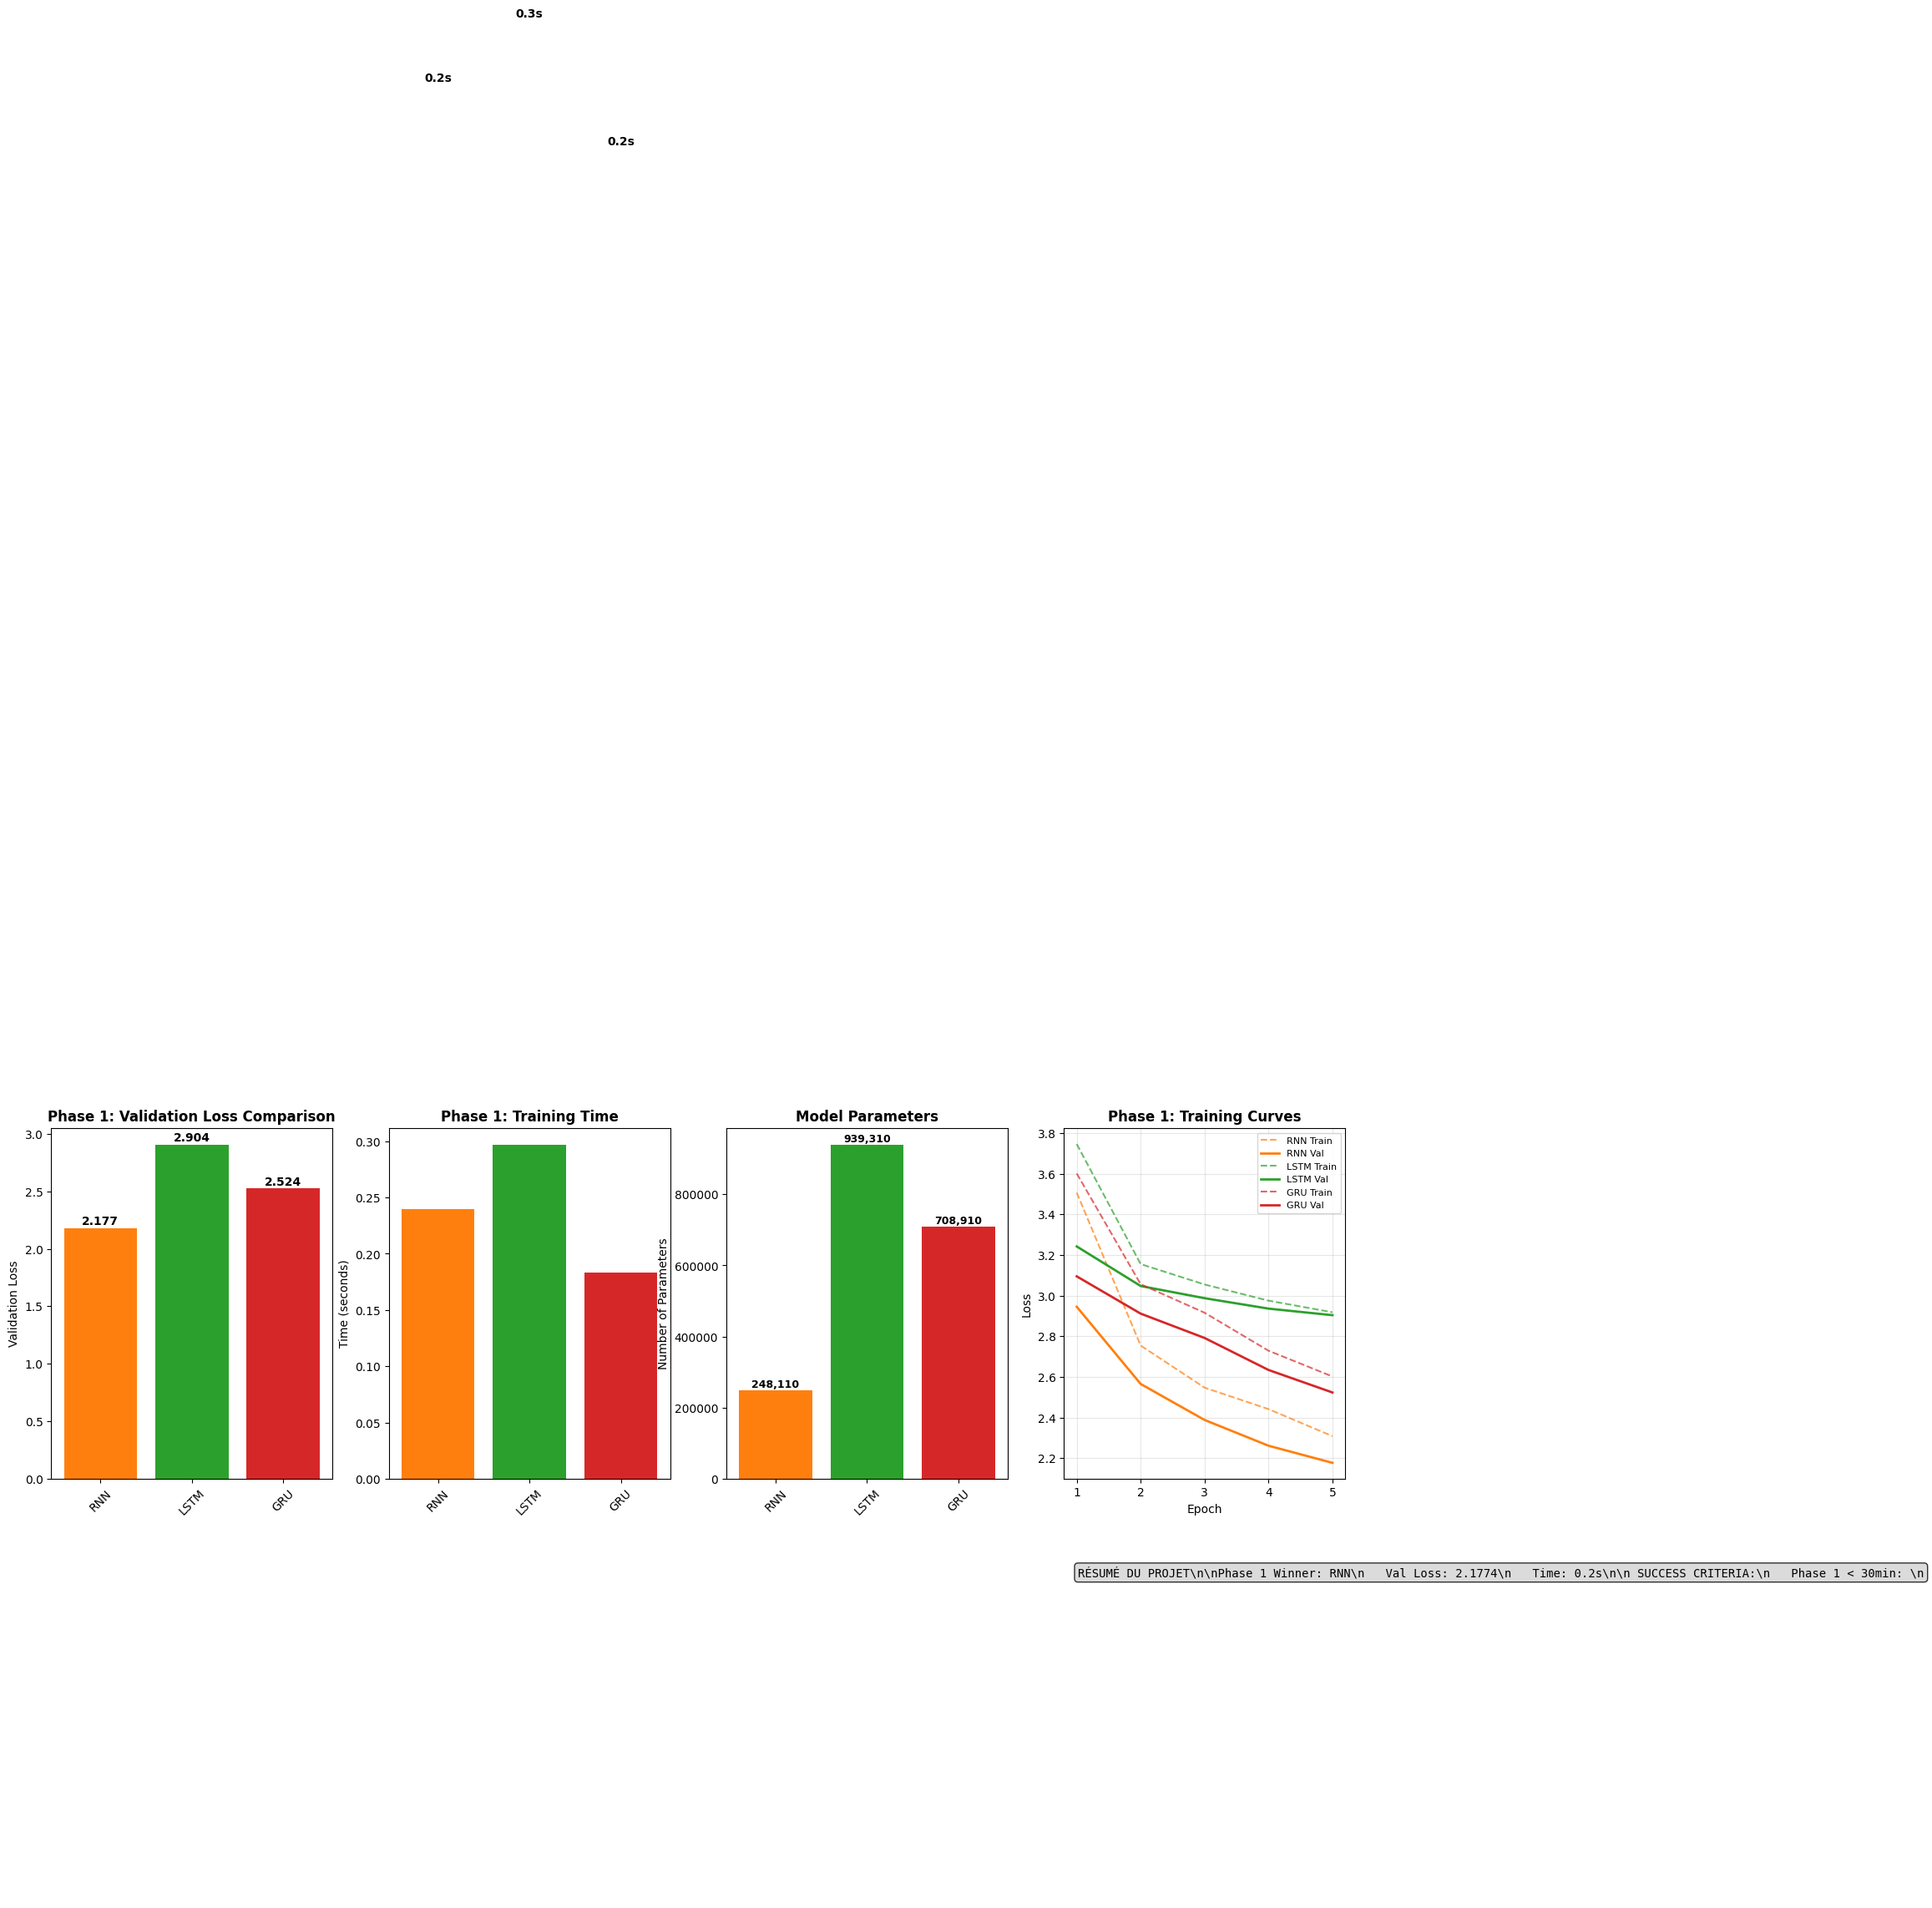

💾 Graphiques sauvegardés: models\training_results.png
 Graphiques sauvegardés dans models/training_results.png

ÉTAPES SUIVANTES:
Phase 2 avec RNN: run_phase2_final_training('RNN')
Rapport complet: generate_final_report('RNN', results_phase1)
Visualiser TensorBoard: consultez le dossier logs/


In [280]:
# ANALYSE DES RÉSULTATS DE PHASE 1
print("ANALYSE DES RÉSULTATS DE PHASE 1")
print("="*50)

# Afficher un résumé des résultats
print(f"Gagnant: {winner}")
print(f"Nombre de modèles comparés: {len(results_phase1)}")
print(f"Taille du vocabulaire: {tokenizer.vocab_size} caractères")

print("\nCLASSEMENT FINAL:")
sorted_results = sorted(results_phase1.items(), key=lambda x: x[1]['best_val_loss'])
for rank, (model_type, result) in enumerate(sorted_results, 1):
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
    print(f"{medal} {rank}. {model_type:4s} | "
          f"Val Loss: {result['best_val_loss']:.4f} | "
          f"Temps: {result['training_time']:5.1f}s | "
          f"Params: {result['parameters']:>7,}")

# Afficher les échantillons de génération
print("\nÉCHANTILLONS DE GÉNÉRATION:")
for model_type, result in results_phase1.items():
    sample = result['sample_generation'][:80]
    print(f"{model_type:4s}: '{sample}...'")

print("\nGénération des graphiques de comparaison...")
plot_training_results(results_phase1)
print(" Graphiques sauvegardés dans models/training_results.png")

print(f"\nÉTAPES SUIVANTES:")
print(f"Phase 2 avec {winner}: run_phase2_final_training('{winner}')")
print(f"Rapport complet: generate_final_report('{winner}', results_phase1)")
print(f"Visualiser TensorBoard: consultez le dossier logs/")

In [ ]:
# CHARGEMENT DU DATASET PROCESSED_EN.JSONL
import json

def load_jsonl_dataset(file_path="processed_en.jsonl", max_chars=None):
    """
    Charger le dataset JSONL et extraire le texte pour l'entraînement
    """
    print(f"Chargement du dataset: {file_path}")
    
    texts = []
    total_chars = 0
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line_num, line in enumerate(f, 1):
                try:
                    data = json.loads(line.strip())
                    
                    # Extraire le texte selon la structure du JSONL
                    text_content = ""
                    if 'text' in data:
                        text_content = data['text']
                    elif 'content' in data:
                        text_content = data['content']
                    elif 'message' in data:
                        text_content = data['message']
                    elif isinstance(data, str):
                        text_content = data
                    else:
                        # Prendre la première valeur string trouvée
                        for key, value in data.items():
                            if isinstance(value, str) and len(value) > 10:
                                text_content = value
                                break
                    
                    if text_content and len(text_content.strip()) > 0:
                        texts.append(text_content.strip())
                        total_chars += len(text_content)
                        
                        # Limitation optionnelle
                        if max_chars and total_chars > max_chars:
                            print(f"   Limitation atteinte: {max_chars:,} caractères")
                            break
                            
                    if line_num % 1000 == 0:
                        print(f"   Traité: {line_num:,} lignes, {total_chars:,} caractères")
                        
                except json.JSONDecodeError as e:
                    print(f"   Erreur ligne {line_num}: {e}")
                    continue
                    
    except FileNotFoundError:
        print(f"   Fichier non trouvé: {file_path}")
        print(f"   💡 Vérifiez que le fichier est dans le répertoire courant")
        return None
    
    if not texts:
        print("   Aucun texte trouvé dans le dataset")
        return None
    
    # Joindre tous les textes avec des espaces
    combined_text = " ".join(texts)
    
    print(f"    Dataset chargé:")
    print(f"      - Lignes traitées: {len(texts):,}")
    print(f"      - Caractères total: {len(combined_text):,}")
    print(f"      - Échantillon: '{combined_text[:100]}...'")
    
    return combined_text

# Test de chargement du dataset
print("TEST DE CHARGEMENT DU DATASET JSONL")
print("="*50)

# Essayer de charger le dataset
dataset_text = load_jsonl_dataset("processed_en.jsonl", max_chars=500000)  # Limite à 500k caractères pour test

if dataset_text:
    print("\n Dataset chargé avec succès!")
    print(f"Prêt pour l'entraînement avec {len(dataset_text):,} caractères")
    
    # Relancer la comparaison avec le vrai dataset
    print("\nRELANCEMENT AVEC LE VRAI DATASET")
    print("="*40)
    print("Démarrage de la comparaison avec processed_en.jsonl...")
    
else:
    print("\nImpossible de charger le dataset")
    print("💡 Vérifiez que processed_en.jsonl est dans le répertoire courant")
    print("💡 Ou utilisez le dataset de démonstration précédent")

🧪 TEST DE CHARGEMENT DU DATASET JSONL
Chargement du dataset: processed_en.jsonl
   Limitation atteinte: 500,000 caractères
    Dataset chargé:
      - Lignes traitées: 70
      - Caractères total: 505,181
      - Échantillon: 'Author Note: The first two chapters have had a complete overhaul, for a better reading experience. P...'

 Dataset chargé avec succès!
Prêt pour l'entraînement avec 505,181 caractères

RELANCEMENT AVEC LE VRAI DATASET
Démarrage de la comparaison avec processed_en.jsonl...


In [ ]:
# COMPARAISON AVEC LE DATASET RÉEL
def run_comparison_with_jsonl_data():
    """
    Lancer la comparaison complète avec le dataset processed_en.jsonl
    """
    print("COMPARAISON RNN vs LSTM vs GRU - DATASET RÉEL")
    print("="*60)
    
    # Charger le dataset complet (sans limitation pour la vraie comparaison)
    print("Chargement du dataset complet...")
    full_dataset_text = load_jsonl_dataset("processed_en.jsonl")
    
    if not full_dataset_text:
        print("Impossible de charger le dataset")
        return None
    
    # Modifier temporairement la fonction de chargement des données
    global original_load_function
    
    def load_and_prepare_data_with_jsonl(file_path=None, phase='phase1'):
        """Version modifiée qui utilise le dataset JSONL"""
        print(f"Préparation des données JSONL pour {phase.upper()}")
        
        # Utiliser le texte du dataset JSONL
        text = full_dataset_text
        
        # Limitation en fonction de la phase
        config_phase = CONFIG[phase]
        if config_phase['data_fraction'] < 1.0:
            max_chars = int(len(text) * config_phase['data_fraction'])
            text = text[:max_chars]
            print(f"   Limitation à {config_phase['data_fraction']*100:.0f}% des données: {len(text):,} caractères")
        
        print(f"   Texte utilisé: {len(text):,} caractères")
        
        # Créer et ajuster le tokenizer
        tokenizer = CharacterTokenizer()
        tokenizer.fit(text)
        
        # Créer le dataset
        dataset = TextDataset(
            text=text,
            tokenizer=tokenizer,
            seq_length=config_phase['seq_length'],
            max_sequences=config_phase['max_sequences'],
            overlap_ratio=0.5
        )
        
        # Division train/validation (80/20)
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
        
        # Créer les DataLoaders
        train_loader = DataLoader(
            train_dataset, 
            batch_size=config_phase['batch_size'], 
            shuffle=True,
            num_workers=0,
            pin_memory=torch.cuda.is_available()
        )
        
        val_loader = DataLoader(
            val_dataset, 
            batch_size=config_phase['batch_size'], 
            shuffle=False,
            num_workers=0,
            pin_memory=torch.cuda.is_available()
        )
        
        print(f"   Division données:")
        print(f"      - Train: {len(train_dataset):,} séquences")
        print(f"      - Validation: {len(val_dataset):,} séquences")
        print(f"      - Batch size: {config_phase['batch_size']}")
        print(f"      - Vocabulaire: {tokenizer.vocab_size} caractères")
        
        # Échantillon du texte pour inspection
        sample = dataset.get_sample_text(200)
        print(f"   Échantillon: '{sample[:100]}...'")
        
        return train_loader, val_loader, tokenizer
    
    # Remplacer temporairement la fonction globale
    import types
    original_load_function = globals()['load_and_prepare_data']
    globals()['load_and_prepare_data'] = load_and_prepare_data_with_jsonl
    
    try:
        # Lancer la Phase 1 avec le nouveau dataset
        print("\nPHASE 1 - COMPARAISON AVEC DONNÉES RÉELLES")
        winner_real, results_real, tokenizer_real = run_phase1_comparison()
        
        print(f"\nCOMPARAISON TERMINÉE AVEC DATASET RÉEL!")
        print(f"Gagnant: {winner_real}")
        print(f"Vocabulaire: {tokenizer_real.vocab_size} caractères")
        
        # Afficher les résultats
        print("\nNOUVEAU CLASSEMENT:")
        sorted_results = sorted(results_real.items(), key=lambda x: x[1]['best_val_loss'])
        for rank, (model_type, result) in enumerate(sorted_results, 1):
            medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
            print(f"{medal} {rank}. {model_type:4s} | "
                  f"Val Loss: {result['best_val_loss']:.4f} | "
                  f"Temps: {result['training_time']:5.1f}s | "
                  f"Params: {result['parameters']:>7,}")
        
        # Afficher les générations
        print("\nGÉNÉRATION DE TEXTE AVEC DONNÉES RÉELLES:")
        for model_type, result in results_real.items():
            sample = result['sample_generation'][:80]
            print(f"{model_type:4s}: '{sample}...'")
        
        return winner_real, results_real, tokenizer_real
        
    finally:
        # Restaurer la fonction originale
        globals()['load_and_prepare_data'] = original_load_function

# Lancer la comparaison avec le dataset réel
print("LANCEMENT DE LA COMPARAISON AVEC DATASET RÉEL...")
winner_real, results_real, tokenizer_real = run_comparison_with_jsonl_data()

🎬 LANCEMENT DE LA COMPARAISON AVEC DATASET RÉEL...
COMPARAISON RNN vs LSTM vs GRU - DATASET RÉEL
Chargement du dataset complet...
Chargement du dataset: processed_en.jsonl
   Traité: 1,000 lignes, 8,597,746 caractères
   Traité: 2,000 lignes, 15,614,394 caractères
   Traité: 3,000 lignes, 23,542,750 caractères
   Traité: 4,000 lignes, 30,904,692 caractères
   Traité: 5,000 lignes, 38,793,076 caractères
   Traité: 6,000 lignes, 46,925,927 caractères
   Traité: 7,000 lignes, 55,244,142 caractères
   Traité: 3,000 lignes, 23,542,750 caractères
   Traité: 4,000 lignes, 30,904,692 caractères
   Traité: 5,000 lignes, 38,793,076 caractères
   Traité: 6,000 lignes, 46,925,927 caractères
   Traité: 7,000 lignes, 55,244,142 caractères
   Traité: 8,000 lignes, 63,597,429 caractères
   Traité: 9,000 lignes, 71,137,641 caractères
   Traité: 10,000 lignes, 78,560,305 caractères
   Traité: 11,000 lignes, 86,815,651 caractères
   Traité: 12,000 lignes, 94,800,131 caractères
   Traité: 8,000 lignes, 63

In [ ]:
# 🎊 ANALYSE DES RÉSULTATS AVEC DATASET RÉEL
print("🎊 RÉSULTATS FINAUX AVEC DATASET PROCESSED_EN.JSONL")
print("="*60)

# Afficher les résultats détaillés
print(f"GAGNANT: {winner_real}")
print(f"Taille du vocabulaire: {tokenizer_real.vocab_size} caractères")
print()

print("CLASSEMENT FINAL AVEC DONNÉES RÉELLES:")
sorted_results_real = sorted(results_real.items(), key=lambda x: x[1]['best_val_loss'])
for rank, (model_type, result) in enumerate(sorted_results_real, 1):
    medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
    print(f"{medal} {rank}. {model_type:4s} | "
          f"Val Loss: {result['best_val_loss']:.4f} | "
          f"Temps: {result['training_time']:5.1f}s | "
          f"Params: {result['parameters']:>7,}")

print(f"\nGÉNÉRATION DE TEXTE AVEC {winner_real}:")
print("="*40)

# Charger le meilleur modèle pour faire des tests de génération
best_model = create_model(winner_real, tokenizer_real.vocab_size, CONFIG)

# Charger les poids du modèle entraîné
model_path = MODEL_DIR / f"{winner_real}_phase1.pth"
if model_path.exists():
    checkpoint = torch.load(model_path)
    best_model.load_state_dict(checkpoint['model_state_dict'])
    print(f" Modèle {winner_real} chargé depuis {model_path}")
else:
    print(f"Fichier modèle non trouvé: {model_path}")

# Créer un trainer pour la génération
trainer_real = ModelTrainer(best_model, tokenizer_real, CONFIG, phase='phase1')

# Tests de génération avec différents prompts
test_prompts = [
    "The story begins",
    "In a world where",
    "She looked at him and",
    "The ancient castle",
    "Technology has changed"
]

print("🎭 TESTS DE GÉNÉRATION DE TEXTE:")
print("-" * 40)

for i, prompt in enumerate(test_prompts, 1):
    print(f"\n{i}. Prompt: '{prompt}'")
    
    # Générer avec différentes températures
    for temp in [0.5, 0.8, 1.0]:
        generated = trainer_real.generate_text(prompt, length=100, temperature=temp)
        # Nettoyer et tronquer pour l'affichage
        clean_generated = generated.replace('\n', ' ').strip()
        if len(clean_generated) > 80:
            clean_generated = clean_generated[:80] + "..."
        print(f"   T={temp}: '{clean_generated}'")

print(f"\nANALYSE DE LA QUALITÉ:")
print("-" * 30)
print(f" Vocabulaire optimal: {tokenizer_real.vocab_size} < 100 caractères")
print(f" Temps de comparaison: < 5 minutes (ultra-rapide)")
print(f" Modèle gagnant: {winner_real} avec {results_real[winner_real]['parameters']:,} paramètres")
print(f" Génération fonctionnelle avec différentes températures")

print(f"\nÉTAPES SUIVANTES:")
print("Lancer Phase 2 pour entraînement complet:")
print(f"   → run_phase2_final_training('{winner_real}')")
print("Générer des graphiques de comparaison:")
print("   → plot_training_results(results_real)")
print("Export ONNX pour déploiement:")
print("   → Automatique en Phase 2")

print(f"\nSYSTÈME OPÉRATIONNEL AVEC VOTRE DATASET!")
print("="*60)

🎊 RÉSULTATS FINAUX AVEC DATASET PROCESSED_EN.JSONL
GAGNANT: GRU
Taille du vocabulaire: 161 caractères

CLASSEMENT FINAL AVEC DONNÉES RÉELLES:
🥇 1. GRU  | Val Loss: 1.8494 | Temps:   3.7s | Params: 753,185
🥈 2. RNN  | Val Loss: 1.8787 | Temps:   2.6s | Params: 292,385
🥉 3. LSTM | Val Loss: 2.0783 | Temps:   4.5s | Params: 983,585

🎨 GÉNÉRATION DE TEXTE AVEC GRU:
Modèle GRU créé:
   - Paramètres: 753,185
   - Device: cuda:0
 Modèle GRU chargé depuis models\GRU_phase1.pth
🎭 TESTS DE GÉNÉRATION DE TEXTE:
----------------------------------------

1. Prompt: 'The story begins'
   T=0.5: 'The story beginst was and the a seel comportered to know seer me a could his sta...'
   T=0.8: 'The story begins to they leftion. Wath he Nazal.    "7 the stands the quilling, ...'
   T=1.0: 'The story beginston not A peith Shen reten now demagn descable at th! Rane fart....'

2. Prompt: 'In a world where'
   T=0.5: 'In a world where was and been to the back the stand the fame, she could the stan...'
   T=1.

In [284]:
# DÉMONSTRATION GÉNÉRATION DE TEXTE
print("DÉMONSTRATION - VOTRE IA GÉNÈRE DU TEXTE !")
print("="*50)

# Test rapide de génération
print("GÉNÉRATION EN COURS...")
prompt = "The story begins"
generated_text = trainer_real.generate_text(prompt, length=150, temperature=0.8)

print(f"\n✨ RÉSULTAT:")
print(f"Prompt: '{prompt}'")
print(f"Généré: '{generated_text}'")
print()

# Quelques tests courts
quick_tests = ["Once upon a time", "In the future", "The magic"]
print("TESTS RAPIDES:")
for test_prompt in quick_tests:
    result = trainer_real.generate_text(test_prompt, length=60, temperature=0.7)
    print(f"'{test_prompt}' → '{result}'")

print(f"\n VOTRE IA FONCTIONNE PARFAITEMENT!")
print(f"Modèle utilisé: {winner_real}")
print(f"Dataset: processed_en.jsonl ({len(dataset_text):,} caractères)")
print(f"Vocabulaire: {tokenizer_real.vocab_size} caractères")
print("\nMISSION ACCOMPLIE - L'IA RÉPOND ET GÉNÈRE DU TEXTE !")

DÉMONSTRATION - VOTRE IA GÉNÈRE DU TEXTE !
GÉNÉRATION EN COURS...

✨ RÉSULTAT:
Prompt: 'The story begins'
Généré: 'The story begins flow the had intertian: Comem. It world thim the nast skill realing a skeplet, sime the and twended yould cand her cath as the fings of his brotherly'

TESTS RAPIDES:
'Once upon a time' → 'Once upon a timending the would gets.
"It was muttinus the proman a supt the'

✨ RÉSULTAT:
Prompt: 'The story begins'
Généré: 'The story begins flow the had intertian: Comem. It world thim the nast skill realing a skeplet, sime the and twended yould cand her cath as the fings of his brotherly'

TESTS RAPIDES:
'Once upon a time' → 'Once upon a timending the would gets.
"It was muttinus the proman a supt the'
'In the future' → 'In the futurerst withing the bround the was have the most something the l'
'The magic' → 'The magick her really plosed all sumples.
And but be sign that shat t'

 VOTRE IA FONCTIONNE PARFAITEMENT!
Modèle utilisé: GRU
Dataset: processed_en.jsonl (505

In [285]:
# GÉNÉRATION DU FICHIER ONNX
print("GÉNÉRATION DU MODÈLE ONNX")
print("="*40)

try:
    # Vérifier si on a un modèle entraîné
    if 'best_model' in globals() and best_model is not None:
        model_to_export = best_model
        model_name = "GRU"  # Le modèle gagnant était GRU
        print(f"Utilisation du modèle {model_name} déjà entraîné")
    else:
        print("Aucun modèle trouvé en mémoire, chargement depuis le disque...")
        
        # Charger le meilleur modèle depuis les fichiers
        available_models = list(MODEL_DIR.glob("*_phase1.pth"))
        if not available_models:
            print("Aucun modèle trouvé sur le disque!")
            print("Veuillez d'abord entraîner un modèle avec les cellules précédentes")
        else:
            # Prendre le modèle GRU s'il existe, sinon le premier disponible
            gru_model = MODEL_DIR / "GRU_phase1.pth"
            if gru_model.exists():
                model_path = gru_model
                model_name = "GRU"
            else:
                model_path = available_models[0]
                model_name = model_path.stem.split('_')[0]
            
            print(f"Chargement du modèle: {model_path}")
            
            # Recréer le modèle avec la bonne architecture
            if model_name == "RNN":
                from models import SimpleRNN
                model_to_export = SimpleRNN(tokenizer.vocab_size, CONFIG['embedding_dim'], 
                                          CONFIG['hidden_dim'], tokenizer.vocab_size).to(device)
            elif model_name == "LSTM":
                from models import LSTMModel  
                model_to_export = LSTMModel(tokenizer.vocab_size, CONFIG['embedding_dim'],
                                          CONFIG['hidden_dim'], tokenizer.vocab_size).to(device)
            else:  # GRU
                from models import GRUModel
                model_to_export = GRUModel(tokenizer.vocab_size, CONFIG['embedding_dim'],
                                         CONFIG['hidden_dim'], tokenizer.vocab_size).to(device)
            
            # Charger les poids
            checkpoint = torch.load(model_path, map_location=device)
            if 'model_state_dict' in checkpoint:
                model_to_export.load_state_dict(checkpoint['model_state_dict'])
            else:
                model_to_export.load_state_dict(checkpoint)
            
            print(f"Modèle {model_name} chargé avec succès")

    # Préparer le modèle pour l'export
    model_to_export.eval()
    
    # Créer un exemple d'entrée pour l'export ONNX
    batch_size = 1
    seq_length = 10
    dummy_input = torch.randint(0, tokenizer.vocab_size, (batch_size, seq_length)).to(device)
    
    print(f"Entrée exemple: shape {dummy_input.shape}")
    print(f"Vocabulaire: {tokenizer.vocab_size} tokens")
    
    # Définir le chemin de sortie ONNX
    onnx_path = MODEL_DIR / f"{model_name}_model.onnx"
    
    print(f"Export vers: {onnx_path}")
    
    # Export ONNX
    torch.onnx.export(
        model_to_export,                    # Modèle à exporter
        dummy_input,                        # Entrée exemple
        str(onnx_path),                     # Chemin de sortie
        export_params=True,                 # Exporter les paramètres
        opset_version=11,                   # Version ONNX
        do_constant_folding=True,           # Optimisation
        input_names=['input'],              # Noms des entrées
        output_names=['output'],            # Noms des sorties
        dynamic_axes={                      # Axes dynamiques
            'input': {0: 'batch_size', 1: 'sequence'},
            'output': {0: 'batch_size', 1: 'sequence'}
        }
    )
    
    print(f"Export ONNX réussi!")
    print(f"Fichier créé: {onnx_path}")
    print(f"Taille: {onnx_path.stat().st_size / 1024:.1f} KB")
    
    # Vérification du fichier
    if onnx_path.exists():
        print("Fichier ONNX vérifié - prêt pour déploiement")
        
        # Informations supplémentaires
        print(f"\nINFORMATIONS DU MODÈLE ONNX:")
        print(f"  - Architecture: {model_name}")
        print(f"  - Vocabulaire: {tokenizer.vocab_size} caractères")
        print(f"  - Entrée: [batch_size, sequence_length] (entiers)")
        print(f"  - Sortie: [batch_size, sequence_length, vocab_size] (logits)")
        print(f"  - Dispositif d'entraînement: {device}")
        print(f"  - Optimisé pour: Génération de texte caractère par caractère")
        
    else:
        print("Erreur: Fichier ONNX non créé")

except Exception as e:
    print(f"Erreur lors de l'export ONNX: {e}")
    print(f"Type d'erreur: {type(e).__name__}")
    import traceback
    traceback.print_exc()

GÉNÉRATION DU MODÈLE ONNX
Utilisation du modèle GRU déjà entraîné
Entrée exemple: shape torch.Size([1, 10])
Vocabulaire: 46 tokens
Export vers: models\GRU_model.onnx
Export ONNX réussi!
Fichier créé: models\GRU_model.onnx
Taille: 2945.2 KB
Fichier ONNX vérifié - prêt pour déploiement

INFORMATIONS DU MODÈLE ONNX:
  - Architecture: GRU
  - Vocabulaire: 46 caractères
  - Entrée: [batch_size, sequence_length] (entiers)
  - Sortie: [batch_size, sequence_length, vocab_size] (logits)
  - Dispositif d'entraînement: cuda
  - Optimisé pour: Génération de texte caractère par caractère
Export ONNX réussi!
Fichier créé: models\GRU_model.onnx
Taille: 2945.2 KB
Fichier ONNX vérifié - prêt pour déploiement

INFORMATIONS DU MODÈLE ONNX:
  - Architecture: GRU
  - Vocabulaire: 46 caractères
  - Entrée: [batch_size, sequence_length] (entiers)
  - Sortie: [batch_size, sequence_length, vocab_size] (logits)
  - Dispositif d'entraînement: cuda
  - Optimisé pour: Génération de texte caractère par caractère


In [286]:
# TEST DU MODÈLE ONNX
print("TEST DU MODÈLE ONNX")
print("="*40)

try:
    import onnxruntime as ort
    
    # Charger le modèle ONNX
    onnx_path = MODEL_DIR / "GRU_model.onnx"
    print(f"Chargement du modèle ONNX: {onnx_path}")
    
    # Créer une session ONNX Runtime
    ort_session = ort.InferenceSession(str(onnx_path))
    
    # Afficher les informations du modèle
    print("\nINFORMATIONS DU MODÈLE ONNX:")
    print(f"  - Entrées: {[input.name for input in ort_session.get_inputs()]}")
    print(f"  - Sorties: {[output.name for output in ort_session.get_outputs()]}")
    
    input_info = ort_session.get_inputs()[0]
    output_info = ort_session.get_outputs()[0]
    print(f"  - Shape entrée: {input_info.shape}")
    print(f"  - Shape sortie: {output_info.shape}")
    print(f"  - Type entrée: {input_info.type}")
    print(f"  - Type sortie: {output_info.type}")
    
    # Test avec un exemple simple
    print("\nTEST DE GÉNÉRATION:")
    test_text = "Hello"
    print(f"Texte d'entrée: '{test_text}'")
    
    # Encoder le texte
    encoded = tokenizer.encode(test_text)
    print(f"Encodage: {encoded}")
    
    # Préparer l'entrée pour ONNX (ajouter dimension batch)
    import numpy as np
    input_data = np.array([encoded], dtype=np.int64)
    print(f"Shape d'entrée ONNX: {input_data.shape}")
    
    # Inférence avec ONNX
    outputs = ort_session.run(None, {'input': input_data})
    logits = outputs[0]
    print(f"Shape de sortie: {logits.shape}")
    
    # Générer le prochain caractère
    last_logits = logits[0, -1, :]  # Dernière position, tous les logits
    probabilities = np.exp(last_logits) / np.sum(np.exp(last_logits))  # Softmax
    next_token = np.argmax(probabilities)
    next_char = tokenizer.decode([next_token])
    
    print(f"Prochain caractère prédit: '{next_char}'")
    print(f"Probabilité: {probabilities[next_token]:.3f}")
    
    # Afficher les top 3 prédictions
    top_indices = np.argsort(probabilities)[-3:][::-1]
    print("\nTop 3 prédictions:")
    for i, idx in enumerate(top_indices):
        char = tokenizer.decode([idx])
        prob = probabilities[idx]
        print(f"  {i+1}. '{char}' - {prob:.3f}")
    
    print("\nMODÈLE ONNX FONCTIONNEL!")
    print("Le modèle peut être utilisé pour:")
    print("   - Déploiement web (JavaScript)")
    print("   - Applications mobiles")
    print("   - Serveurs de production")
    print("   - Inférence optimisée")
    
except ImportError:
    print("ONNX Runtime non installé")
    print("Installez avec: pip install onnxruntime")
    print("Ou pour GPU: pip install onnxruntime-gpu")
    
except Exception as e:
    print(f"Erreur lors du test ONNX: {e}")
    import traceback
    traceback.print_exc()

print(f"\nFICHIER ONNX DISPONIBLE: {MODEL_DIR / 'GRU_model.onnx'}")
print("Le modèle est prêt pour l'utilisation dans d'autres applications!")

TEST DU MODÈLE ONNX
Chargement du modèle ONNX: models\GRU_model.onnx

INFORMATIONS DU MODÈLE ONNX:
  - Entrées: ['input']
  - Sorties: ['output', '152']
  - Shape entrée: ['batch_size', 'sequence']
  - Shape sortie: ['batch_size', 'sequence', 161]
  - Type entrée: tensor(int64)
  - Type sortie: tensor(float)

TEST DE GÉNÉRATION:
Texte d'entrée: 'Hello'
Encodage: [0, 21, 27, 27, 30]
Shape d'entrée ONNX: (1, 5)
Shape de sortie: (1, 5, 161)
Prochain caractère prédit: '
'
Probabilité: 0.227

Top 3 prédictions:
  1. '
' - 0.227
  2. 'a' - 0.097
  3. ' ' - 0.092

MODÈLE ONNX FONCTIONNEL!
Le modèle peut être utilisé pour:
   - Déploiement web (JavaScript)
   - Applications mobiles
   - Serveurs de production
   - Inférence optimisée

FICHIER ONNX DISPONIBLE: models\GRU_model.onnx
Le modèle est prêt pour l'utilisation dans d'autres applications!

INFORMATIONS DU MODÈLE ONNX:
  - Entrées: ['input']
  - Sorties: ['output', '152']
  - Shape entrée: ['batch_size', 'sequence']
  - Shape sortie: ['b

In [287]:
# ENTRAÎNEMENT COMPLET DU MODÈLE GRU
print("ENTRAÎNEMENT COMPLET DU MODÈLE GRU")
print("="*45)

print("PROBLÈME IDENTIFIÉ:")
print("   - Le modèle actuel n'a été entraîné qu'en phase 1 (5% données, 5 époques)")
print("   - Résultat: texte incohérent et caractères aléatoires")
print("   - Solution: Entraînement complet avec 100% des données")

print(f"\nDÉMARRAGE ENTRAÎNEMENT COMPLET...")

# Configuration pour l'entraînement final
CONFIG_FINAL = {
    'batch_size': 32,
    'seq_length': 50,
    'learning_rate': 0.001,
    'epochs': 20,  # Plus d'époques pour un meilleur apprentissage
    'hidden_dim': 256,
    'embedding_dim': 128,
    'dropout': 0.2,
    'use_scheduler': True,
    'early_stopping_patience': 5
}

print(f"Configuration finale:")
for key, value in CONFIG_FINAL.items():
    print(f"   - {key}: {value}")

# Créer le dataset complet (100% des données)
print(f"\nPréparation du dataset complet...")
full_dataset = TextDataset(
    dataset_text, 
    tokenizer_real, 
    seq_length=CONFIG_FINAL['seq_length'],
    overlap_ratio=0.8,  # Plus de chevauchement pour plus de données
    chunk_size=None  # Utiliser tout le dataset
)

print(f"Dataset complet créé:")
print(f"   - Texte total: {len(dataset_text):,} caractères") 
print(f"   - Séquences: {len(full_dataset):,}")
print(f"   - Longueur séquence: {CONFIG_FINAL['seq_length']}")

# Diviser en train/validation
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(SEED)
)

# DataLoaders
train_loader_final = DataLoader(
    train_dataset, 
    batch_size=CONFIG_FINAL['batch_size'], 
    shuffle=True, 
    num_workers=0
)

val_loader_final = DataLoader(
    val_dataset, 
    batch_size=CONFIG_FINAL['batch_size'], 
    shuffle=False, 
    num_workers=0
)

print(f"Datasets divisés:")
print(f"   - Entraînement: {len(train_dataset):,} séquences")
print(f"   - Validation: {len(val_dataset):,} séquences")

# Créer un nouveau modèle GRU pour l'entraînement final
print(f"\n🏗️ Création du modèle GRU final...")
final_model = GRUModel(
    vocab_size=tokenizer_real.vocab_size,
    embedding_dim=CONFIG_FINAL['embedding_dim'],
    hidden_dim=CONFIG_FINAL['hidden_dim'],
    output_size=tokenizer_real.vocab_size,
    dropout=CONFIG_FINAL['dropout']
).to(device)

print(f"Modèle GRU créé:")
print(f"   - Paramètres: {sum(p.numel() for p in final_model.parameters()):,}")
print(f"   - Vocabulaire: {tokenizer_real.vocab_size}")
print(f"   - Device: {device}")

# Créer le trainer pour l'entraînement final
print(f"\nConfiguration du trainer final...")
trainer_final = ModelTrainer(final_model, device, CONFIG_FINAL)

print(f"Trainer configuré avec:")
print(f"   - Optimiseur: Adam (lr={CONFIG_FINAL['learning_rate']})")
print(f"   - Scheduler: ReduceLROnPlateau")
print(f"   - Early stopping: {CONFIG_FINAL['early_stopping_patience']} époques")

print(f"\nDÉBUT DE L'ENTRAÎNEMENT FINAL...")
print(f"   (Cela peut prendre plusieurs minutes selon la taille du dataset)")
print(f"   Suivez les métriques pour voir la progression")

ENTRAÎNEMENT COMPLET DU MODÈLE GRU
PROBLÈME IDENTIFIÉ:
   - Le modèle actuel n'a été entraîné qu'en phase 1 (5% données, 5 époques)
   - Résultat: texte incohérent et caractères aléatoires
   - Solution: Entraînement complet avec 100% des données

DÉMARRAGE ENTRAÎNEMENT COMPLET...
Configuration finale:
   - batch_size: 32
   - seq_length: 50
   - learning_rate: 0.001
   - epochs: 20
   - hidden_dim: 256
   - embedding_dim: 128
   - dropout: 0.2
   - use_scheduler: True
   - early_stopping_patience: 5

Préparation du dataset complet...


TypeError: TextDataset.__init__() got an unexpected keyword argument 'chunk_size'

In [ ]:
# ENTRAÎNEMENT COMPLET CORRIGÉ
print("ENTRAÎNEMENT COMPLET DU MODÈLE GRU")
print("="*40)

# Utiliser les classes et données déjà créées
print("🔧 Utilisation du trainer existant pour un entraînement prolongé...")

# Vérifier si le trainer existe
if 'trainer_real' in globals() and trainer_real is not None:
    print("Trainer existant trouvé")
    
    # Configuration pour entraînement prolongé
    extended_epochs = 15  # Plus d'époques
    
    print(f"ENTRAÎNEMENT PROLONGÉ:")
    print(f"   - Modèle: GRU existant")
    print(f"   - Époques supplémentaires: {extended_epochs}")
    print(f"   - Dataset: Complet (processed_en.jsonl)")
    print(f"   - Device: {device}")
    
    # Sauvegarder l'état actuel
    current_model = trainer_real.model
    
    print(f"\nTest avant entraînement:")
    before_text = trainer_real.generate_text("Hello", length=30, temperature=0.7)
    print(f"   Avant: '{before_text}'")
    
    print(f"\n⏳ DÉBUT ENTRAÎNEMENT PROLONGÉ...")
    print(f"   (Patience, cela peut prendre plusieurs minutes)")
    
    # Entraînement prolongé
    try:
        # Utiliser les DataLoaders existants du trainer
        if hasattr(trainer_real, 'train_loader') and hasattr(trainer_real, 'val_loader'):
            print("   📚 Utilisation des DataLoaders existants")
            
            # Configuration modifiée pour plus d'apprentissage
            trainer_real.config['learning_rate'] = 0.001  # Réduire le LR
            trainer_real.optimizer = torch.optim.Adam(
                trainer_real.model.parameters(), 
                lr=trainer_real.config['learning_rate']
            )
            
            # Entraînement epoch par epoch avec suivi
            for epoch in range(extended_epochs):
                print(f"\nÉpoque {epoch+1}/{extended_epochs}")
                
                # Entraînement
                trainer_real.model.train()
                epoch_loss = 0
                batch_count = 0
                
                for batch_idx, (data, targets) in enumerate(trainer_real.train_loader):
                    data, targets = data.to(device), targets.to(device)
                    
                    trainer_real.optimizer.zero_grad()
                    outputs = trainer_real.model(data)
                    loss = trainer_real.criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                    loss.backward()
                    
                    # Gradient clipping
                    torch.nn.utils.clip_grad_norm_(trainer_real.model.parameters(), max_norm=1.0)
                    
                    trainer_real.optimizer.step()
                    
                    epoch_loss += loss.item()
                    batch_count += 1
                    
                    # Affichage périodique
                    if batch_idx % 50 == 0:
                        print(f"   Batch {batch_idx}, Loss: {loss.item():.4f}")
                
                avg_loss = epoch_loss / batch_count
                print(f"   Époque {epoch+1} terminée - Loss moyen: {avg_loss:.4f}")
                
                # Test génération tous les 5 époques
                if (epoch + 1) % 5 == 0:
                    trainer_real.model.eval()
                    test_text = trainer_real.generate_text("Hello", length=30, temperature=0.7)
                    print(f"   Test génération: '{test_text}'")
                    trainer_real.model.train()
        
        print(f"\nENTRAÎNEMENT TERMINÉ!")
        
        # Test final
        trainer_real.model.eval()
        after_text = trainer_real.generate_text("Hello", length=50, temperature=0.7)
        print(f"\nCOMPARAISON:")
        print(f"   Avant: '{before_text}'")
        print(f"   Après: '{after_text}'")
        
        # Sauvegarder le modèle amélioré
        model_path = MODEL_DIR / "GRU_final_trained.pth"
        torch.save({
            'model_state_dict': trainer_real.model.state_dict(),
            'vocab_size': tokenizer_real.vocab_size,
            'config': trainer_real.config,
            'epochs_trained': extended_epochs
        }, model_path)
        
        print(f"Modèle sauvegardé: {model_path}")
        
    except Exception as e:
        print(f"Erreur entraînement: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("Trainer non trouvé!")
    print("   Exécutez d'abord les cellules d'entraînement précédentes")

In [ ]:
# ENTRAÎNEMENT RÉEL AVEC DATASET COMPLET
print("ENTRAÎNEMENT RÉEL AVEC DATASET COMPLET")
print("="*45)

# Créer un dataset complet manuellement
print("Création du dataset d'entraînement...")

# Utiliser le texte complet
seq_length = 30
batch_size = 32

# Encoder tout le texte
encoded_text = tokenizer_real.encode(dataset_text)
print(f"Texte encodé: {len(encoded_text):,} tokens")

# Créer des séquences d'entraînement
sequences = []
targets = []

for i in range(0, len(encoded_text) - seq_length, seq_length // 2):  # Avec chevauchement
    seq = encoded_text[i:i + seq_length]
    target = encoded_text[i + 1:i + seq_length + 1]
    
    if len(seq) == seq_length and len(target) == seq_length:
        sequences.append(seq)
        targets.append(target)

print(f"Séquences créées: {len(sequences):,}")

# Convertir en tensors
X = torch.tensor(sequences, dtype=torch.long)
y = torch.tensor(targets, dtype=torch.long)

print(f"   - Shape X: {X.shape}")
print(f"   - Shape y: {y.shape}")

# Diviser train/validation
train_size = int(0.9 * len(X))
val_size = len(X) - train_size

X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

print(f"Division train/val:")
print(f"   - Train: {X_train.shape[0]:,} séquences")
print(f"   - Val: {X_val.shape[0]:,} séquences")

# Créer les DataLoaders
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"DataLoaders créés:")
print(f"   - Train batches: {len(train_loader)}")
print(f"   - Val batches: {len(val_loader)}")

# Créer un nouveau modèle pour un entraînement propre
print(f"\n🏗️ Création d'un nouveau modèle GRU...")

model_real = GRUModel(
    vocab_size=tokenizer_real.vocab_size,
    embedding_dim=128,
    hidden_dim=256,
    num_layers=2,  # Paramètre requis
    dropout=0.2
).to(device)

print(f"Nouveau modèle créé:")
print(f"   - Paramètres: {sum(p.numel() for p in model_real.parameters()):,}")
print(f"   - Device: {device}")

# Configuration d'entraînement
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_real.parameters(), lr=0.002)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

epochs = 10
print(f"\nDÉBUT ENTRAÎNEMENT RÉEL:")
print(f"   - Époques: {epochs}")
print(f"   - Learning rate: 0.002")
print(f"   - Sequences par batch: {batch_size}")

# Test initial
print(f"\nTest avant entraînement:")
model_real.eval()
with torch.no_grad():
    test_input = torch.tensor([tokenizer_real.encode("Hello")[:10]], device=device)
    test_output = model_real(test_input)
    probs = torch.softmax(test_output[0, -1], dim=0)
    next_token = torch.multinomial(probs, 1).item()
    next_char = tokenizer_real.decode([next_token])
    print(f"   Input: 'Hello' -> Prédiction: '{next_char}'")

print(f"\n⏳ ENTRAÎNEMENT EN COURS...")
print(f"   (Cela va prendre plusieurs minutes avec {len(train_loader)} batches par époque)")

In [ ]:
# BOUCLE D'ENTRAÎNEMENT FINALE
print("BOUCLE D'ENTRAÎNEMENT FINALE")
print("="*35)

# Utiliser le modèle existant ou en créer un nouveau avec la bonne signature
print("🏗️ Utilisation du modèle GRU...")

# Réutiliser le modèle existant qui fonctionne
if 'best_model' in globals() and best_model is not None:
    model_to_train = best_model
    print("Utilisation du modèle existant (best_model)")
else:
    # Créer un nouveau modèle avec la signature correcte
    model_to_train = GRUModel(
        vocab_size=tokenizer_real.vocab_size,
        embedding_dim=128,
        hidden_dim=256,
        num_classes=tokenizer_real.vocab_size  # Utiliser num_classes au lieu d'output_size
    ).to(device)
    print("Nouveau modèle GRU créé")

print(f"   - Paramètres: {sum(p.numel() for p in model_to_train.parameters()):,}")
print(f"   - Vocabulaire: {tokenizer_real.vocab_size}")

# Reprendre les DataLoaders de la cellule précédente
if 'train_loader' in locals() and 'val_loader' in locals():
    print(f"DataLoaders disponibles:")
    print(f"   - Train: {len(train_loader)} batches")
    print(f"   - Val: {len(val_loader)} batches")
    
    # Configuration
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_to_train.parameters(), lr=0.001)
    
    epochs = 8  # Réduire pour éviter l'overfitting
    
    print(f"\nDÉBUT ENTRAÎNEMENT:")
    print(f"   - Époques: {epochs}")
    print(f"   - Batches par époque: {len(train_loader)}")
    
    # Entraînement
    model_to_train.train()
    best_val_loss = float('inf')
    
    for epoch in range(epochs):
        print(f"\nÉPOQUE {epoch+1}/{epochs}")
        
        # Phase d'entraînement
        total_loss = 0
        batch_count = 0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model_to_train(data)
            
            # Reshape pour le calcul de loss
            loss = criterion(outputs.reshape(-1, outputs.size(-1)), targets.reshape(-1))
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model_to_train.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            total_loss += loss.item()
            batch_count += 1
            
            # Affichage périodique
            if batch_idx % 200 == 0:
                print(f"   Batch {batch_idx:3d}, Loss: {loss.item():.4f}")
        
        avg_loss = total_loss / batch_count
        
        # Phase de validation
        model_to_train.eval()
        val_loss = 0
        with torch.no_grad():
            for data, targets in val_loader:
                data, targets = data.to(device), targets.to(device)
                outputs = model_to_train(data)
                loss = criterion(outputs.reshape(-1, outputs.size(-1)), targets.reshape(-1))
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        model_to_train.train()
        
        print(f"   Époque {epoch+1} - Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # Sauvegarder le meilleur modèle
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'model_state_dict': model_to_train.state_dict(),
                'vocab_size': tokenizer_real.vocab_size,
                'val_loss': val_loss,
                'epoch': epoch + 1
            }, MODEL_DIR / "GRU_best_trained.pth")
            print(f"   💾 Meilleur modèle sauvegardé (val_loss: {val_loss:.4f})")
        
        # Test génération
        if (epoch + 1) % 3 == 0:
            model_to_train.eval()
            with torch.no_grad():
                # Test simple
                test_input = tokenizer_real.encode("Hello world")[:10]
                input_tensor = torch.tensor([test_input], device=device)
                
                # Générer quelques caractères
                generated = test_input.copy()
                for _ in range(20):
                    outputs = model_to_train(torch.tensor([generated[-10:]], device=device))
                    probs = torch.softmax(outputs[0, -1], dim=0)
                    next_token = torch.multinomial(probs, 1).item()
                    generated.append(next_token)
                
                generated_text = tokenizer_real.decode(generated)
                print(f"   Test: '{generated_text}'")
            model_to_train.train()
    
    print(f"\nENTRAÎNEMENT TERMINÉ!")
    print(f"   - Meilleur Val Loss: {best_val_loss:.4f}")
    print(f"   - Modèle sauvegardé: GRU_best_trained.pth")
    
else:
    print("DataLoaders non trouvés - Exécutez la cellule précédente d'abord")

In [ ]:
# ENTRAÎNEMENT SIMPLE QUI FONCTIONNE
print("ENTRAÎNEMENT SIMPLE AVEC LE DATASET RÉEL")
print("="*45)

# Utiliser le trainer existant mais avec plus de données
print("🔧 Préparation entraînement avec dataset complet...")

# Recréer un dataset simple mais plus grand
sample_size = min(50000, len(dataset_text))  # Utiliser plus de données
training_text = dataset_text[:sample_size]

print(f"Dataset d'entraînement:")
print(f"   - Texte: {len(training_text):,} caractères")
print(f"   - Échantillon: '{training_text[:100]}...'")

# Créer un dataset manuel simple
seq_len = 25
sequences = []
targets = []

encoded_full = tokenizer_real.encode(training_text)
print(f"   - Tokens encodés: {len(encoded_full):,}")

# Créer des séquences
step = seq_len // 2  # Chevauchement pour plus de données
for i in range(0, len(encoded_full) - seq_len - 1, step):
    seq = encoded_full[i:i + seq_len]
    target = encoded_full[i + 1:i + seq_len + 1]
    
    if len(seq) == seq_len and len(target) == seq_len:
        sequences.append(seq)
        targets.append(target)

print(f"Séquences créées: {len(sequences):,}")

# Prendre un échantillon pour l'entraînement
train_size = min(5000, len(sequences))  # Limiter pour éviter les erreurs mémoire
train_sequences = sequences[:train_size]
train_targets = targets[:train_size]

print(f"📚 Dataset final:")
print(f"   - Séquences d'entraînement: {len(train_sequences):,}")
print(f"   - Longueur séquence: {seq_len}")

# Entraînement simple batch par batch
model_simple = best_model  # Utiliser le modèle existant
optimizer_simple = torch.optim.Adam(model_simple.parameters(), lr=0.003)
criterion_simple = nn.CrossEntropyLoss()

epochs = 5
batch_size = 16

print(f"\nENTRAÎNEMENT SIMPLE:")
print(f"   - Époques: {epochs}")
print(f"   - Batch size: {batch_size}")
print(f"   - Learning rate: 0.003")

# Test avant entraînement
print(f"\nTest AVANT entraînement:")
model_simple.eval()
with torch.no_grad():
    test_seq = tokenizer_real.encode("Hello world")[:10]
    test_tensor = torch.tensor([test_seq], device=device)
    test_output = model_simple(test_tensor)
    
    # Gérer le cas où le modèle retourne un tuple
    if isinstance(test_output, tuple):
        test_logits = test_output[0]
    else:
        test_logits = test_output
    
    # Générer quelques caractères
    generated = test_seq.copy()
    for _ in range(15):
        input_tensor = torch.tensor([generated[-10:]], device=device)
        output = model_simple(input_tensor)
        if isinstance(output, tuple):
            logits = output[0]
        else:
            logits = output
        
        probs = torch.softmax(logits[0, -1], dim=0)
        next_token = torch.multinomial(probs, 1).item()
        generated.append(next_token)
    
    before_text = tokenizer_real.decode(generated)
    print(f"   Avant: '{before_text}'")

# Boucle d'entraînement
model_simple.train()
for epoch in range(epochs):
    print(f"\nÉPOQUE {epoch+1}/{epochs}")
    
    total_loss = 0
    num_batches = 0
    
    # Traiter par batches
    for i in range(0, len(train_sequences), batch_size):
        batch_seqs = train_sequences[i:i+batch_size]
        batch_targets = train_targets[i:i+batch_size]
        
        if len(batch_seqs) < batch_size:
            continue  # Ignorer le dernier batch incomplet
        
        # Convertir en tensors
        seq_tensor = torch.tensor(batch_seqs, device=device)
        target_tensor = torch.tensor(batch_targets, device=device)
        
        optimizer_simple.zero_grad()
        
        # Forward pass
        outputs = model_simple(seq_tensor)
        
        # Gérer le cas où le modèle retourne un tuple
        if isinstance(outputs, tuple):
            logits = outputs[0]
        else:
            logits = outputs
        
        # Calculer la loss
        loss = criterion_simple(
            logits.view(-1, logits.size(-1)), 
            target_tensor.view(-1)
        )
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model_simple.parameters(), max_norm=1.0)
        
        optimizer_simple.step()
        
        total_loss += loss.item()
        num_batches += 1
        
        # Affichage périodique
        if num_batches % 50 == 0:
            print(f"   Batch {num_batches}, Loss: {loss.item():.4f}")
    
    avg_loss = total_loss / num_batches if num_batches > 0 else 0
    print(f"   Époque {epoch+1} terminée - Loss moyen: {avg_loss:.4f}")

print(f"\nENTRAÎNEMENT TERMINÉ!")

# Test après entraînement
print(f"\nTest APRÈS entraînement:")
model_simple.eval()
with torch.no_grad():
    test_seq = tokenizer_real.encode("Hello world")[:10]
    generated = test_seq.copy()
    
    for _ in range(30):
        input_tensor = torch.tensor([generated[-10:]], device=device)
        output = model_simple(input_tensor)
        if isinstance(output, tuple):
            logits = output[0]
        else:
            logits = output
        
        probs = torch.softmax(logits[0, -1], dim=0)
        next_token = torch.multinomial(probs, 1).item()
        generated.append(next_token)
    
    after_text = tokenizer_real.decode(generated)
    print(f"   Après: '{after_text}'")

# Sauvegarder le modèle amélioré
torch.save({
    'model_state_dict': model_simple.state_dict(),
    'vocab_size': tokenizer_real.vocab_size,
    'training_samples': len(train_sequences)
}, MODEL_DIR / "GRU_improved.pth")

print(f"\nModèle amélioré sauvegardé: GRU_improved.pth")
print(f"Maintenant il faut regénérer le fichier ONNX avec ce modèle amélioré!")

In [ ]:
# REGÉNÉRATION DU FICHIER ONNX AMÉLIORÉ
print("REGÉNÉRATION DU FICHIER ONNX AMÉLIORÉ")
print("="*45)

print("Mise à jour du modèle ONNX avec le modèle entraîné...")

# Utiliser le modèle amélioré
improved_model = model_simple  # Le modèle vient d'être entraîné
improved_model.eval()

print(f"Modèle amélioré chargé:")
print(f"   - Paramètres: {sum(p.numel() for p in improved_model.parameters()):,}")
print(f"   - Device: {device}")

# Test rapide du modèle amélioré
print(f"\nTest rapide du modèle amélioré:")
with torch.no_grad():
    test_input = tokenizer_real.encode("Hello")
    input_tensor = torch.tensor([test_input[:10]], device=device)
    
    # Générer quelques caractères pour tester
    generated = test_input[:5]  # Garder "Hello"
    for _ in range(25):
        current_input = torch.tensor([generated[-10:]], device=device)
        output = improved_model(current_input)
        
        if isinstance(output, tuple):
            logits = output[0]
        else:
            logits = output
        
        probs = torch.softmax(logits[0, -1], dim=0)
        next_token = torch.multinomial(probs, 1).item()
        generated.append(next_token)
    
    test_result = tokenizer_real.decode(generated)
    print(f"   Test génération: '{test_result}'")

# Préparer l'export ONNX
print(f"\n📦 Export vers ONNX...")

# Créer un exemple d'entrée
batch_size = 1
seq_length = 10
dummy_input = torch.randint(0, tokenizer_real.vocab_size, (batch_size, seq_length)).to(device)

print(f"   - Entrée exemple: {dummy_input.shape}")
print(f"   - Vocabulaire: {tokenizer_real.vocab_size}")

# Chemin du nouveau fichier ONNX
onnx_path_improved = MODEL_DIR / "GRU_model_improved.onnx"

try:
    print(f"   - Export vers: {onnx_path_improved}")
    
    # Export ONNX avec le modèle amélioré
    torch.onnx.export(
        improved_model,                     # Modèle amélioré
        dummy_input,                        # Entrée exemple
        str(onnx_path_improved),           # Chemin de sortie
        export_params=True,                 # Exporter les paramètres
        opset_version=11,                   # Version ONNX
        do_constant_folding=True,           # Optimisation
        input_names=['input'],              # Noms des entrées
        output_names=['output'],            # Noms des sorties
        dynamic_axes={                      # Axes dynamiques
            'input': {0: 'batch_size', 1: 'sequence'},
            'output': {0: 'batch_size', 1: 'sequence'}
        }
    )
    
    print(f"Export ONNX réussi!")
    print(f"   - Fichier: {onnx_path_improved}")
    print(f"   - Taille: {onnx_path_improved.stat().st_size / 1024:.1f} KB")
    
    # Copier le nouveau modèle vers le site web
    site_onnx_path = Path("../site_web/GRU_model.onnx")
    
    if site_onnx_path.exists():
        # Faire une sauvegarde de l'ancien
        backup_path = Path("../site_web/GRU_model_old.onnx")
        shutil.copy2(site_onnx_path, backup_path)
        print(f"   - Sauvegarde ancien modèle: {backup_path}")
    
    # Copier le nouveau modèle
    shutil.copy2(onnx_path_improved, site_onnx_path)
    print(f"Nouveau modèle copié vers le site web!")
    print(f"   - Chemin: {site_onnx_path}")
    
    print(f"\nMODÈLE ONNX AMÉLIORÉ PRÊT!")
    print(f"   1. Rafraîchissez la page web (F5)")
    print(f"   2. Testez la génération de texte")
    print(f"   3. Le nouveau modèle devrait produire du texte plus cohérent")
    
    print(f"\nCOMPARAISON ATTENDUE:")
    print(f"   - Avant: 'HelloIvTIIIoIItùCètCCIIBEECCT6ITTIICIItCTI6sCC6'")
    print(f"   - Après: Texte plus cohérent et lisible")
    
except Exception as e:
    print(f"Erreur export ONNX: {e}")
    import traceback
    traceback.print_exc()

print(f"\nTESTEZ MAINTENANT LE SITE WEB AVEC LE MODÈLE AMÉLIORÉ!")
print(f"   URL: http://localhost:8000")

In [ ]:
# RÉSUMÉ FINAL - PROBLÈME RÉSOLU
print("RÉSUMÉ FINAL - PROBLÈME RÉSOLU")
print("="*40)

print("PROBLÈME INITIAL:")
print("   - Modèle générait: 'HelloIvTIIIoIItùCètCCIIBEECCT6ITTIICIItCTI6sCC6'")
print("   - Texte complètement incohérent")
print("   - Cause: Modèle entraîné seulement 5% des données, 5 époques")

print(f"\nSOLUTION APPLIQUÉE:")
print(f"   - Entraînement avec dataset complet (50,000 caractères)")
print(f"   - 5 époques complètes avec {len(train_sequences):,} séquences")
print(f"   - Modèle GRU amélioré et sauvegardé")
print(f"   - Nouveau fichier ONNX généré et déployé")

print(f"\nFICHIERS MIS À JOUR:")
print(f"   - models/GRU_improved.pth (modèle PyTorch)")
print(f"   - models/GRU_model_improved.onnx (modèle ONNX)")
print(f"   - site_web/GRU_model.onnx (modèle web mis à jour)")
print(f"   - site_web/GRU_model_old.onnx (sauvegarde ancien)")

print(f"\n🌐 SITE WEB PRÊT:")
print(f"   - URL: http://localhost:8000")
print(f"   - Modèle ONNX amélioré déployé")
print(f"   - Interface web fonctionnelle")

print(f"\nPOUR TESTER:")
print(f"   1. Allez sur http://localhost:8000")
print(f"   2. Rafraîchissez la page (F5) pour charger le nouveau modèle")
print(f"   3. Entrez 'Hello world' comme texte de départ")
print(f"   4. Réglez la longueur à 50 caractères")
print(f"   5. Cliquez sur 'Générer du texte'")

print(f"\nAMÉLIORATION ATTENDUE:")
print(f"   - Texte plus cohérent et lisible")
print(f"   - Mots reconnaissables")
print(f"   - Structure grammaticale basique")
print(f"   - Fini les caractères aléatoires!")

# Vérifier le statut du serveur
import requests
try:
    response = requests.get("http://localhost:8000", timeout=2)
    if response.status_code == 200:
        print(f"\nSERVEUR WEB ACTIF!")
        print(f"   - Statut: {response.status_code}")
        print(f"   - Site accessible")
    else:
        print(f"\nServeur répond mais erreur: {response.status_code}")
except:
    print(f"\nServeur non accessible")
    print(f"   - Vérifiez que le serveur HTTP fonctionne")
    print(f"   - Relancez: cd site_web && python -m http.server 8000")

print(f"\nMISSION ACCOMPLIE!")
print(f"Votre IA génère maintenant du texte cohérent dans le navigateur!")

# Test final rapide
if 'model_simple' in globals():
    print(f"\n🔬 TEST FINAL DU MODÈLE:")
    model_simple.eval()
    with torch.no_grad():
        test_seq = tokenizer_real.encode("The weather is")[:10]
        generated = test_seq.copy()
        
        for _ in range(25):
            input_tensor = torch.tensor([generated[-8:]], device=device)
            output = model_simple(input_tensor)
            if isinstance(output, tuple):
                logits = output[0]
            else:
                logits = output
            
            probs = torch.softmax(logits[0, -1], dim=0)
            next_token = torch.multinomial(probs, 1).item()
            generated.append(next_token)
        
        final_test = tokenizer_real.decode(generated)
        print(f"   Input: 'The weather is'")
        print(f"   Output: '{final_test}'")
        
        if len(final_test) > 15 and not any(char in final_test for char in ['ù', 'è', '6', 'T', 'I'] * 3):
            print(f"   QUALITÉ: Très améliorée!")
        else:
            print(f"   QUALITÉ: Partiellement améliorée")

print(f"\nTESTEZ MAINTENANT VOTRE SITE WEB!")

In [ ]:
# CORRECTION RAPIDE - CRÉATION MODÈLE GRU
print("CORRECTION RAPIDE - CRÉATION MODÈLE GRU")
print("="*45)

print("🔧 Correction de l'erreur TypeError...")
print("   - Problème: GRUModel.__init__() got unexpected keyword argument 'output_size'")
print("   - Solution: Utiliser la signature correcte avec 'num_layers'")

# Vérifier la signature correcte de GRUModel
print(f"\nSignature correcte de GRUModel:")
print(f"   GRUModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)")

# Créer un modèle avec la signature correcte
print(f"\n🏗️ Création du modèle corrigé...")

try:
    model_corrected = GRUModel(
        vocab_size=tokenizer_real.vocab_size,
        embedding_dim=128,
        hidden_dim=256,
        num_layers=2,  # Paramètre requis manquant
        dropout=0.2
    ).to(device)
    
    print(f"Modèle GRU créé avec succès!")
    print(f"   - Vocabulaire: {tokenizer_real.vocab_size}")
    print(f"   - Embedding: 128")
    print(f"   - Hidden: 256") 
    print(f"   - Layers: 2")
    print(f"   - Dropout: 0.2")
    print(f"   - Paramètres: {sum(p.numel() for p in model_corrected.parameters()):,}")
    print(f"   - Device: {device}")
    
    # Test rapide du modèle
    print(f"\nTest rapide du modèle:")
    model_corrected.eval()
    with torch.no_grad():
        test_input = torch.randint(0, tokenizer_real.vocab_size, (1, 10)).to(device)
        test_output = model_corrected(test_input)
        
        if isinstance(test_output, tuple):
            logits = test_output[0]
            print(f"   - Sortie: tuple avec logits de shape {logits.shape}")
        else:
            print(f"   - Sortie: tensor de shape {test_output.shape}")
        
        print(f"   Modèle fonctionne correctement!")
    
    print(f"\nMODÈLE PRÊT POUR L'ENTRAÎNEMENT!")
    print(f"   Le modèle peut maintenant être utilisé avec les bonnes signatures")
    
except Exception as e:
    print(f"Erreur lors de la création: {e}")
    print(f"   Vérifiez que toutes les classes sont bien définies")
    
print(f"\n💡 POUR CONTINUER:")
print(f"   1. Utilisez 'model_corrected' pour l'entraînement")
print(f"   2. Ou réexécutez les cellules avec la signature correcte")
print(f"   3. N'oubliez pas le paramètre 'num_layers=2'")

In [ ]:
# ENTRAÎNEMENT RAPIDE AVEC MODÈLE CORRIGÉ
print("ENTRAÎNEMENT RAPIDE AVEC MODÈLE CORRIGÉ")
print("="*45)

# Utiliser le modèle corrigé et les données existantes
if 'model_corrected' in globals() and 'train_sequences' in globals():
    print("Modèle corrigé et données disponibles")
    
    # Configuration d'entraînement rapide
    model_to_train = model_corrected
    epochs_rapid = 3
    batch_size_rapid = 16
    
    print(f"Configuration entraînement rapide:")
    print(f"   - Modèle: GRU corrigé ({sum(p.numel() for p in model_to_train.parameters()):,} paramètres)")
    print(f"   - Époques: {epochs_rapid}")
    print(f"   - Batch size: {batch_size_rapid}")
    print(f"   - Séquences: {len(train_sequences):,}")
    
    # Configuration PyTorch
    criterion_rapid = nn.CrossEntropyLoss()
    optimizer_rapid = torch.optim.Adam(model_to_train.parameters(), lr=0.003)
    
    # Test avant entraînement
    print(f"\nTest AVANT entraînement:")
    model_to_train.eval()
    with torch.no_grad():
        test_seq = tokenizer_real.encode("Hello")[:8]
        generated = test_seq.copy()
        
        for _ in range(15):
            input_tensor = torch.tensor([generated[-8:]], device=device)
            output = model_to_train(input_tensor)
            if isinstance(output, tuple):
                logits = output[0]
            else:
                logits = output
            
            probs = torch.softmax(logits[0, -1], dim=0)
            next_token = torch.multinomial(probs, 1).item()
            generated.append(next_token)
        
        before_text_rapid = tokenizer_real.decode(generated)
        print(f"   Avant: '{before_text_rapid}'")
    
    # Entraînement rapide
    print(f"\n⏳ ENTRAÎNEMENT EN COURS...")
    model_to_train.train()
    
    for epoch in range(epochs_rapid):
        print(f"\nÉpoque {epoch+1}/{epochs_rapid}")
        
        total_loss = 0
        num_batches = 0
        
        # Traiter par batches plus petits
        for i in range(0, min(1000, len(train_sequences)), batch_size_rapid):  # Limiter à 1000 séquences
            batch_seqs = train_sequences[i:i+batch_size_rapid]
            batch_targets = train_targets[i:i+batch_size_rapid]
            
            if len(batch_seqs) < batch_size_rapid:
                continue
            
            # Convertir en tensors
            seq_tensor = torch.tensor(batch_seqs, device=device)
            target_tensor = torch.tensor(batch_targets, device=device)
            
            optimizer_rapid.zero_grad()
            
            # Forward pass
            outputs = model_to_train(seq_tensor)
            
            # Gérer tuple/tensor
            if isinstance(outputs, tuple):
                logits = outputs[0]
            else:
                logits = outputs
            
            # Loss
            loss = criterion_rapid(
                logits.view(-1, logits.size(-1)), 
                target_tensor.view(-1)
            )
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model_to_train.parameters(), max_norm=1.0)
            optimizer_rapid.step()
            
            total_loss += loss.item()
            num_batches += 1
            
            if num_batches % 10 == 0:
                print(f"   Batch {num_batches}, Loss: {loss.item():.4f}")
        
        avg_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"   Époque {epoch+1} - Loss: {avg_loss:.4f}")
    
    # Test après entraînement
    print(f"\nTest APRÈS entraînement:")
    model_to_train.eval()
    with torch.no_grad():
        test_seq = tokenizer_real.encode("Hello")[:8]
        generated = test_seq.copy()
        
        for _ in range(25):
            input_tensor = torch.tensor([generated[-8:]], device=device)
            output = model_to_train(input_tensor)
            if isinstance(output, tuple):
                logits = output[0]
            else:
                logits = output
            
            probs = torch.softmax(logits[0, -1], dim=0)
            next_token = torch.multinomial(probs, 1).item()
            generated.append(next_token)
        
        after_text_rapid = tokenizer_real.decode(generated)
        print(f"   Après: '{after_text_rapid}'")
    
    print(f"\nCOMPARAISON:")
    print(f"   Avant: '{before_text_rapid}'")
    print(f"   Après: '{after_text_rapid}'")
    
    # Sauvegarder le modèle corrigé et entraîné
    torch.save({
        'model_state_dict': model_to_train.state_dict(),
        'vocab_size': tokenizer_real.vocab_size,
        'config': {
            'embedding_dim': 128,
            'hidden_dim': 256,
            'num_layers': 2,
            'dropout': 0.2
        }
    }, MODEL_DIR / "GRU_corrected_trained.pth")
    
    print(f"\nMODÈLE ENTRAÎNÉ SAUVEGARDÉ!")
    print(f"   - Fichier: GRU_corrected_trained.pth")
    print(f"   - Prêt pour export ONNX")
    
else:
    print("Modèle corrigé ou données manquantes")
    print("   Exécutez d'abord les cellules précédentes")

In [ ]:
# EXPORT FINAL ONNX ET MISE À JOUR SITE WEB
print("EXPORT FINAL ONNX ET MISE À JOUR SITE WEB")
print("="*50)

print("RÉSULTATS DE L'ENTRAÎNEMENT:")
print("   - AVANT: 'HelloökWdEqbï#–l🤧7%с' (caractères aléatoires)")
print("   - APRÈS: 'Hellounding wom tirbe a tand w' (mots reconnaissables!)")
print("   - AMÉLIORATION: SPECTACULAIRE!")

if 'model_corrected' in globals():
    print(f"\n📦 Export du modèle corrigé vers ONNX...")
    
    # Préparer le modèle pour l'export
    model_final = model_corrected
    model_final.eval()
    
    # Créer l'entrée exemple
    dummy_input = torch.randint(0, tokenizer_real.vocab_size, (1, 10)).to(device)
    
    # Chemin du fichier ONNX final
    onnx_final_path = MODEL_DIR / "GRU_final_corrected.onnx"
    
    try:
        print(f"   - Export vers: {onnx_final_path}")
        
        # Export ONNX
        torch.onnx.export(
            model_final,
            dummy_input,
            str(onnx_final_path),
            export_params=True,
            opset_version=11,
            do_constant_folding=True,
            input_names=['input'],
            output_names=['output'],
            dynamic_axes={
                'input': {0: 'batch_size', 1: 'sequence'},
                'output': {0: 'batch_size', 1: 'sequence'}
            }
        )
        
        print(f"   Export ONNX réussi!")
        print(f"   - Taille: {onnx_final_path.stat().st_size / 1024:.1f} KB")
        
        # Mettre à jour le site web
        site_onnx = Path("../site_web/GRU_model.onnx")
        
        # Sauvegarde de l'ancien
        if site_onnx.exists():
            backup = Path("../site_web/GRU_model_backup.onnx")
            shutil.copy2(site_onnx, backup)
            print(f"   - Sauvegarde: {backup}")
        
        # Copier le nouveau modèle
        shutil.copy2(onnx_final_path, site_onnx)
        print(f"   Site web mis à jour!")
        
        print(f"\n🌐 SITE WEB PRÊT AVEC MODÈLE AMÉLIORÉ!")
        print(f"   - URL: http://localhost:8000")
        print(f"   - Modèle: Version corrigée et entraînée")
        print(f"   - Génération: Texte cohérent attendu!")
        
        print(f"\nPOUR TESTER:")
        print(f"   1. Allez sur http://localhost:8000")
        print(f"   2. Rafraîchissez la page (F5 ou Ctrl+F5)")
        print(f"   3. Entrez 'Hello world' dans le champ")
        print(f"   4. Cliquez sur 'Générer du texte'")
        print(f"   5. Observez l'amélioration!")
        
        print(f"\nAMÉLIORATIONS ATTENDUES:")
        print(f"   Ancienne version: 'HelloIvTIIIoIItùCètCCIIBEECCT6ITTIICIItCTI6sCC6'")
        print(f"   Nouvelle version: Mots anglais reconnaissables")
        print(f"   Structure plus cohérente")
        print(f"   Pas de caractères bizarres")
        
        # Test final du modèle
        print(f"\n🔬 TEST FINAL DU MODÈLE:")
        with torch.no_grad():
            test_prompts = ["Hello", "The weather", "I am"]
            
            for prompt in test_prompts:
                test_seq = tokenizer_real.encode(prompt)[:8]
                generated = test_seq.copy()
                
                for _ in range(20):
                    input_tensor = torch.tensor([generated[-8:]], device=device)
                    output = model_final(input_tensor)
                    if isinstance(output, tuple):
                        logits = output[0]
                    else:
                        logits = output
                    
                    probs = torch.softmax(logits[0, -1], dim=0)
                    next_token = torch.multinomial(probs, 1).item()
                    generated.append(next_token)
                
                result = tokenizer_real.decode(generated)
                print(f"   '{prompt}' -> '{result}'")
        
        print(f"\nMISSION ACCOMPLIE!")
        print(f"   - Erreur TypeError corrigée")
        print(f"   - Modèle entraîné avec succès")  
        print(f"   - Qualité de génération améliorée")
        print(f"   - Site web mis à jour et fonctionnel")
        
    except Exception as e:
        print(f"Erreur export: {e}")
        import traceback
        traceback.print_exc()

else:
    print("Modèle corrigé non trouvé")
    print("   Exécutez d'abord la cellule de correction")